# 1. Importação

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
diretorio: str = r'G:\Meu Drive\UNIFOR\PROJETOS SOLO\01 - CAU ML'
diretorio_img: str = fr'{diretorio}\IMAGENS\CLUSTERIZACAO'
diretorio_df: str = fr'{diretorio}\DATAFRAMES'
arquivo: str = 'DF_CAU_04.parquet'
df_post = pd.read_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow')

In [3]:
df_4_analise = df_post.copy()

In [4]:
intervalos = [15,30,40,50,60,75]
df_4_analise['CATEGORIA_IDADE'] = pd.cut(x=df_post['IDADE'], bins=intervalos)

In [5]:
df_4_analise['labels'].unique()

array([2, 0, 1])

In [6]:
print(df_4_analise.columns.tolist())

['IDADE', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR', 'RENDA_FONTE_ASSALARIADO1', 'RENDA_FONTE_ASSALARIADO4', 'RENDA_FONTE_AUTONOMO2', 'RENDA_FONTE_EMPRESARIO2', 'FONTE_RENDA_AU', 'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA', 'HH_EM_AU', 'HH_FORA_AU', 'RENDA_POR_HH_AU', 'RENDA_POR_HH_TOTAL', 'ESCOLARIDADE', 'INDICE_FORMACAO_ACADEMICA', 'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS', 'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS', 'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU', 'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA', 'QNTD_ENTIDADES_FILIADAS', 'DOMINIO_INFORMATICA', 'CATEGORIA_GENERO', 'UF', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT', 'ATUACAO_PSG', 'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT', 'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS', 'DOMINIO_OUTROS_SOFTWARES', 'labels', 'CATEGORIA_IDADE']


In [6]:
import seaborn as sns

## Estatística Geral

In [7]:
df_post.groupby('labels').describe()

IDADE                                                      \
        count       mean        std   min   25%   50%   75%   max   
labels                                                              
0       394.0  29.634518   6.058529  23.0  26.0  28.0  31.0  67.0   
1        37.0  37.405405  10.843481  24.0  29.0  37.0  43.0  66.0   
2       238.0  40.689076  11.398237  24.0  32.0  38.5  46.0  73.0   

       RENDA_M_INDIVIDUAL            ... ATUACAO_ENS       \
                    count      mean  ...         75%  max   
labels                               ...                    
0                   394.0  2.771574  ...         0.0  1.0   
1                    37.0  4.000000  ...         0.0  1.0   
2                   238.0  4.352941  ...         0.0  1.0   

       DOMINIO_OUTROS_SOFTWARES                                               
                          count      mean       std  min  25%  50%  75%  max  
labels                                                                        
0                         394.0  3.243655  1.705111  0.0  3.0  4.0  4.0  5.0  
1                          37.0  3.081081  1.689483  0.0  2.0  4.0  4.0  5.0  
2                         238.0  2.987395  1.722233  0.0  2.0  4.0  4.0  5.0  

[3 rows x 296 columns]

In [10]:
df_post['labels'].value_counts(normalize=False)

labels
0    394
2    238
1     37
Name: count, dtype: int64

In [17]:
df_post['labels'].value_counts(normalize=True)

labels
0    0.588939
2    0.355755
1    0.055306
Name: proportion, dtype: float64

In [225]:
df_4_analise.groupby(['labels'])['INDICE_PROJ_OBRA'].mean()

labels
0    1.690355
1    4.621622
2    1.764706
Name: INDICE_PROJ_OBRA, dtype: float64

In [8]:
total_por_label = df_4_analise[df_4_analise['CATEGORIA_GENERO'] != 'INDEF'].groupby('labels').size()
df_4_analise[df_4_analise['CATEGORIA_GENERO'] != 'INDEF'].groupby(['labels', 'CATEGORIA_GENERO']).size().div(total_por_label, level='labels')

labels  CATEGORIA_GENERO
0       H                   0.426513
        M                   0.573487
1       H                   0.575758
        M                   0.424242
2       H                   0.418269
        M                   0.581731
dtype: float64

In [19]:
total_por_label = df_4_analise.groupby('labels').size()
df_4_analise.groupby(['labels', 'CATEGORIA_PJ']).size().div(total_por_label, level='labels')

labels  CATEGORIA_PJ
0       MISTA           0.083756
        NAO             0.860406
        UNI             0.055838
1       MISTA           0.216216
        NAO             0.702703
        UNI             0.081081
2       MISTA           0.117647
        NAO             0.680672
        UNI             0.201681
dtype: float64

In [127]:
df_4_analise.groupby(['labels', 'CATEGORIA_GENERO'])['RENDA_M_INDIVIDUAL'].mean()

labels  CATEGORIA_GENERO
0       H                   2.993243
        INDEF               2.680851
        M                   2.628141
1       H                   4.263158
        INDEF               4.000000
        M                   3.642857
2       H                   4.505747
        INDEF               4.633333
        M                   4.173554
Name: RENDA_M_INDIVIDUAL, dtype: float64

In [21]:
df_4_analise.groupby(['labels', 'CATEGORIA_PJ'])['RENDA_POR_HH_AU'].mean()

labels  CATEGORIA_PJ
0       MISTA           0.742424
        NAO             0.759292
        UNI             0.659848
1       MISTA           1.056250
        NAO             0.920513
        UNI             0.800000
2       MISTA           1.243452
        NAO             1.055350
        UNI             1.041319
Name: RENDA_POR_HH_AU, dtype: float64

In [22]:
df_4_analise.groupby(['labels', 'CATEGORIA_IDADE'])['RENDA_M_INDIVIDUAL'].mean()

labels  CATEGORIA_IDADE
0       (15, 30]           2.696113
        (30, 40]           3.093023
        (40, 50]           2.631579
        (50, 60]           2.000000
        (60, 75]           3.000000
1       (15, 30]           3.230769
        (30, 40]           4.250000
        (40, 50]           4.857143
        (50, 60]           4.333333
        (60, 75]           4.000000
2       (15, 30]           3.666667
        (30, 40]           4.350515
        (40, 50]           4.647059
        (50, 60]           4.400000
        (60, 75]           5.100000
Name: RENDA_M_INDIVIDUAL, dtype: float64

In [23]:
df_4_analise.groupby(['labels', 'ESCOLARIDADE'])['RENDA_M_INDIVIDUAL'].mean()

labels  ESCOLARIDADE
0       1               2.786408
        2               2.714286
        3               3.000000
1       1               3.736842
        2               4.277778
2       1               4.607143
        2               4.195804
        3               4.514286
        4               5.000000
Name: RENDA_M_INDIVIDUAL, dtype: float64

In [139]:
df_4_analise.groupby(['labels'])['RENDA_M_INDIVIDUAL'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,394.0,2.771574,0.901570,1.0,2.0,3.0,3.0,6.0
1,37.0,4.000000,1.247219,2.0,3.0,4.0,4.0,7.0
2,238.0,4.352941,1.121995,1.0,4.0,4.0,5.0,7.0


In [25]:
df_4_analise.groupby('CATEGORIA_IDADE')['labels'].value_counts(normalize=True)

CATEGORIA_IDADE  labels
(15, 30]         0         0.829912
                 2         0.131965
                 1         0.038123
(30, 40]         2         0.497436
                 0         0.441026
                 1         0.061538
(40, 50]         2         0.662338
                 0         0.246753
                 1         0.090909
(50, 60]         2         0.757576
                 0         0.151515
                 1         0.090909
(60, 75]         2         0.869565
                 1         0.086957
                 0         0.043478
Name: proportion, dtype: float64

In [13]:
figsize_hist = (8, 5)

In [14]:
dict_ticks = {}
dict_ticks['FONTE_RENDA_AU'] = ([1, 2, 3, 4, 5, 6, 7], ['<= 1 SM', '1-3 SM', '3-6 SM', '6-9 SM', '9-12 SM', '12-15 SM', '> 15 SM'])
dict_ticks['RENDA_M_INDIVIDUAL'] = ([0, 1, 2, 3, 4, 5, 6], ['<= 1 SM', '1-3 SM', '3-6 SM', '6-9 SM', '9-12 SM', '12-15 SM', '> 15 SM'])
dict_ticks['HH_EM_AU'] = ([0, 1, 2, 3, 4, 5], ['Esporadicamente', 'até 10h', '10-20h', '20-30h', '30-40h', '> 40h'])
dict_ticks['INDICE_PROJ_OBRA'] = ([0, 1, 2, 3, 4, 5], ['até Aprov/PB', 'até PE', 'Coord. Comp', 'Autoria Comp.', 'até Fisc. Obra', 'Exec. Obra'])

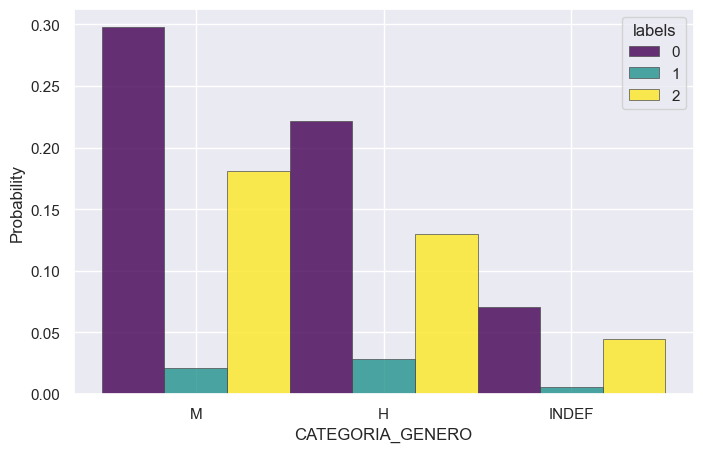

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize_hist)
sns.histplot(
    data=df_4_analise,
    x="CATEGORIA_GENERO", hue="labels",
    stat='probability', 
    multiple="dodge",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=6,
    alpha=.8,
    #common_norm=True,
    #binrange=(0,6), alpha=.8, binwidth=1
)
arquivo = 'CLUSTER_CAT_GENERO_0_DODGE.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

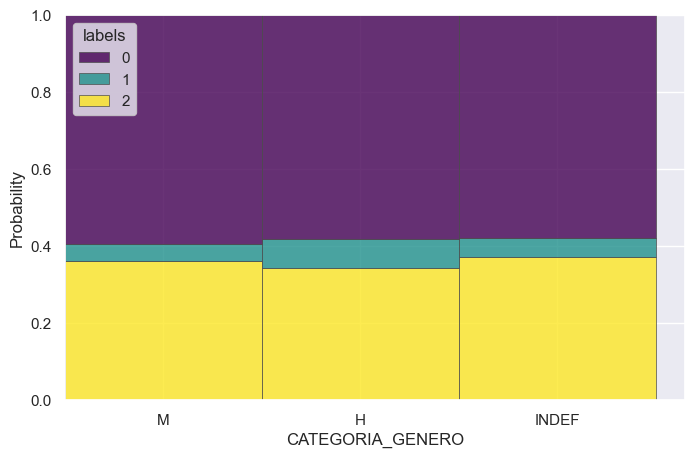

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize_hist)
sns.histplot(
    data=df_4_analise,
    x="CATEGORIA_GENERO", hue="labels",
    #x="CATEGORIA_PJ", hue="labels",
    #x="RENDA_POR_HH_TOTAL", hue="REGIAO",
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    #bins=6,
    binrange=(0,6), alpha=.8, binwidth=1
)
arquivo = 'CLUSTER_CAT_GENERO_1_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

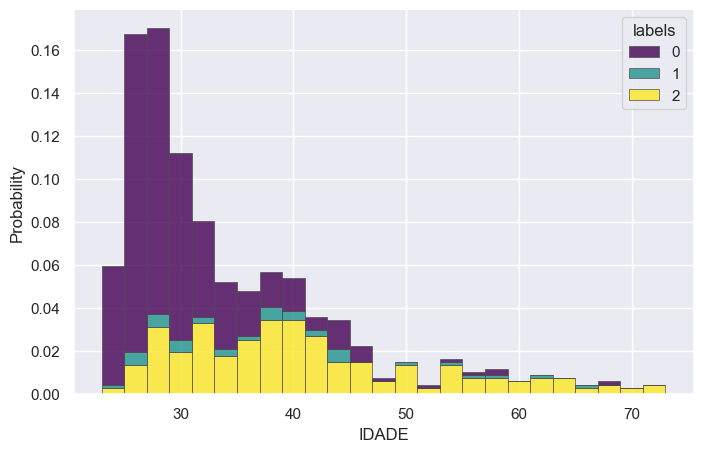

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize_hist)
sns.histplot(
    data=df_4_analise,
    x="IDADE", hue="labels",
    stat='probability', 
    multiple="stack",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=6,
    alpha=.8,
    binwidth=2
    #common_norm=True,
    #binrange=(0,6), alpha=.8, 
)
arquivo = 'CLUSTER_IDADE_STACK.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

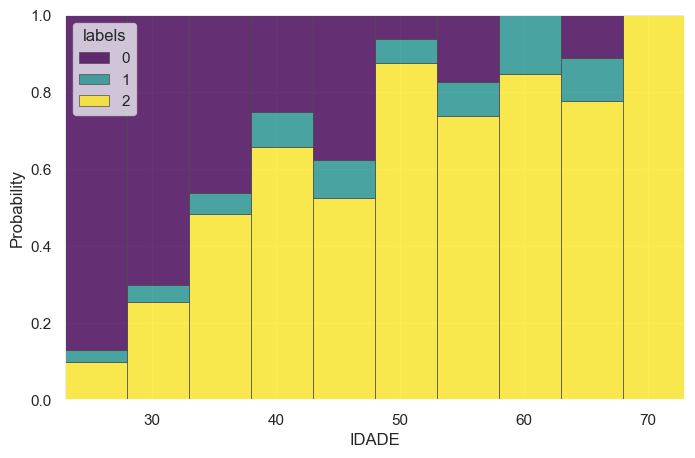

In [31]:
plt.figure(figsize=figsize_hist)
sns.histplot(
    data=df_4_analise,
    x="IDADE", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=6,
    #common_norm=True,
    #binrange=(0,6),
    alpha=.8,
    binwidth=5
)
arquivo = 'CLUSTER_IDADE_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

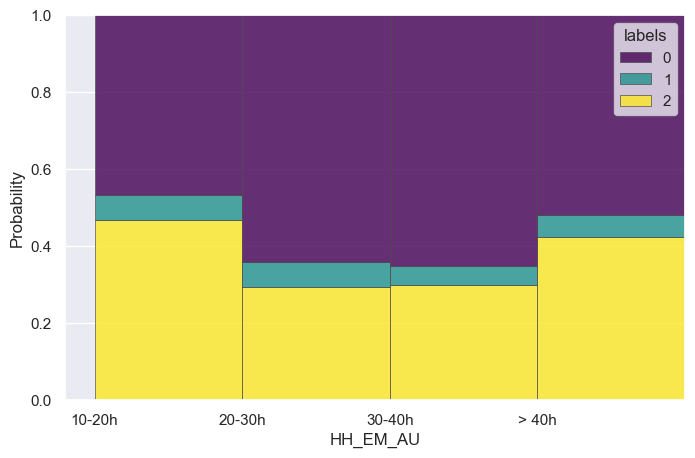

In [32]:
plt.figure(figsize=figsize_hist)
plt.xticks(dict_ticks['HH_EM_AU'][0], dict_ticks['HH_EM_AU'][1], rotation=0)
sns.histplot(
    data=df_4_analise,
    x="HH_EM_AU", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    #bins=6,
    #common_norm=True,
    binrange=(0,6), alpha=.8,
    binwidth=1
)
arquivo = 'CLUSTER_HH_EM_AU_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

In [33]:
df_4_analise['RENDA_M_INDIVIDUAL'].unique()

array([4., 3., 2., 5., 6., 7., 1.])

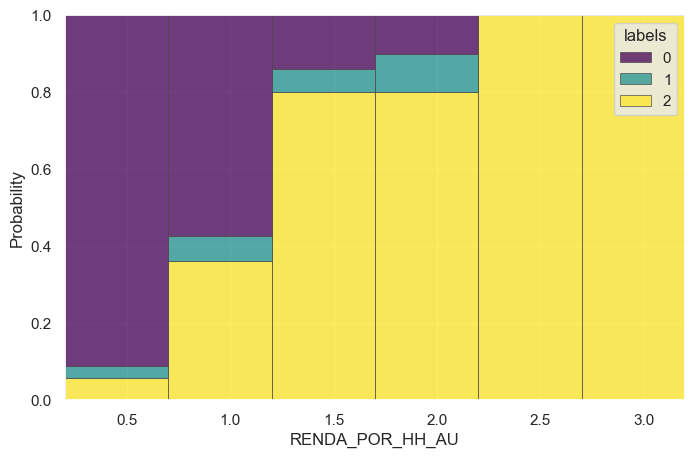

In [34]:
plt.figure(figsize=figsize_hist)
sns.histplot(
    data=df_4_analise,
    x="RENDA_POR_HH_AU", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    #bins=6,
    #common_norm=True,
    #binrange=(0,6), alpha=.8,
    binwidth=.5
)
arquivo = 'CLUSTER_RENDA_POR_HH_AU_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

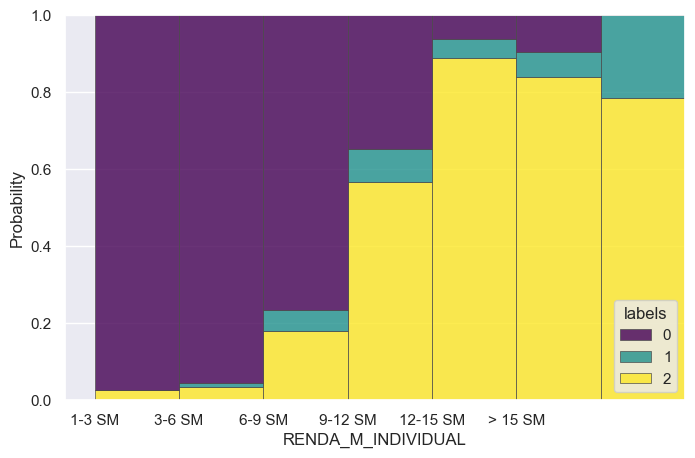

In [35]:
plt.figure(figsize=(8, 5))
plt.xticks(dict_ticks['RENDA_M_INDIVIDUAL'][0], dict_ticks['RENDA_M_INDIVIDUAL'][1], rotation=0)
sns.histplot(
    data=df_4_analise,
    x="RENDA_M_INDIVIDUAL", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    #common_norm=True,
    legend=True,
    binrange=(0,8), 
    binwidth=1
)
#plt.legend(loc='upper right')
#plt.show()
arquivo = 'CLUSTER_0_RENDA_M_INDIVIDUAL_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

## Renda Média

In [17]:
df_4_analise.groupby('labels')['RENDA_M_INDIVIDUAL'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,394.0,2.771574,0.901570,1.0,2.0,3.0,3.0,6.0
1,37.0,4.000000,1.247219,2.0,3.0,4.0,4.0,7.0
2,238.0,4.352941,1.121995,1.0,4.0,4.0,5.0,7.0


In [37]:
df_4_analise.groupby('labels')['ESCOLARIDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,394.0,1.218274,0.419707,1.0,1.0,1.0,1.0,3.0
1,37.0,1.486486,0.506712,1.0,1.0,1.0,2.0,2.0
2,238.0,1.945378,0.669687,1.0,2.0,2.0,2.0,4.0


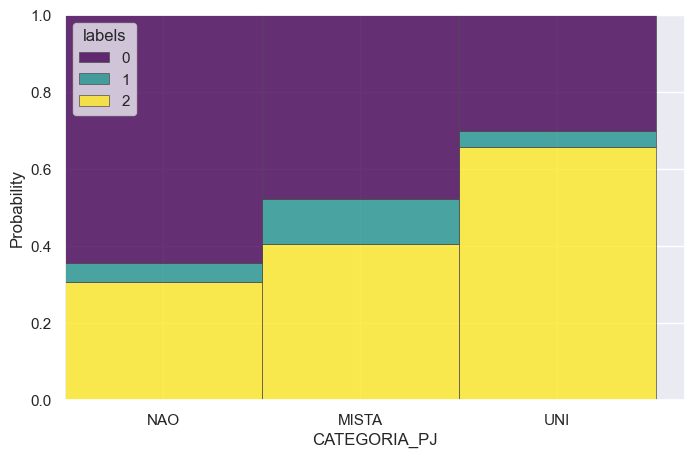

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_4_analise,
    x="CATEGORIA_PJ", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='viridis',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=3,
    #common_norm=True,
    binrange=(0,3), alpha=.8, binwidth=1
)
arquivo = 'CLUSTER_0_CAT_PJ_0_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

In [41]:
import matplotlib.pyplot as plt

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


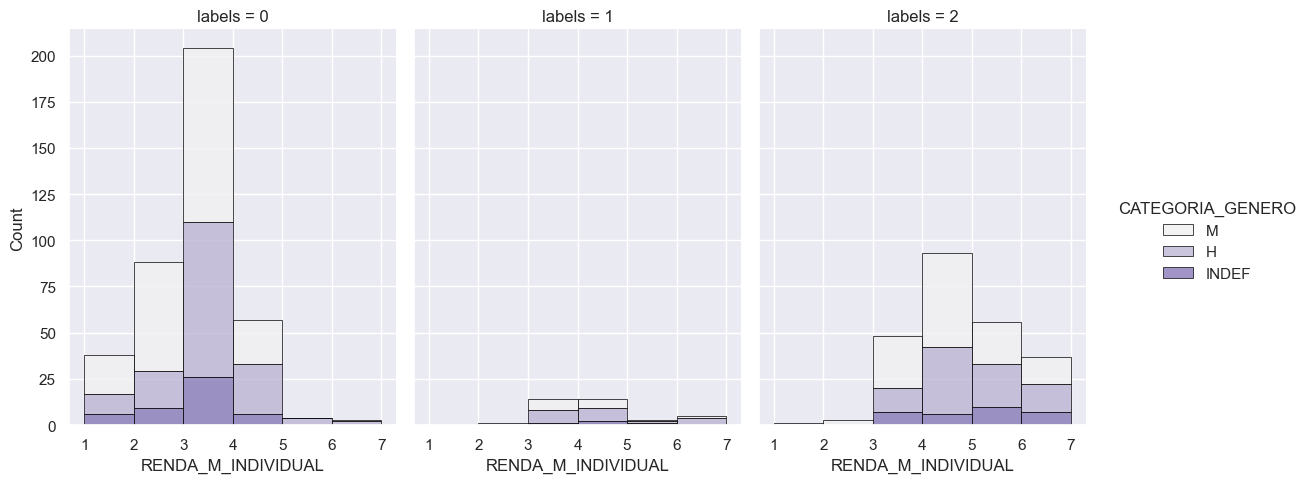

In [42]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="RENDA_M_INDIVIDUAL", col="labels", hue="CATEGORIA_GENERO",
    aspect=.75, linewidth=.5, palette='light:m', binwidth=1, multiple='stack', alpha=.75, edgecolor='black',kde=False
    #**kwargs_displot
)
arquivo = 'CLUSTER_1_RENDA_M_INDIV_CAT_GENERO_01_STACK.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


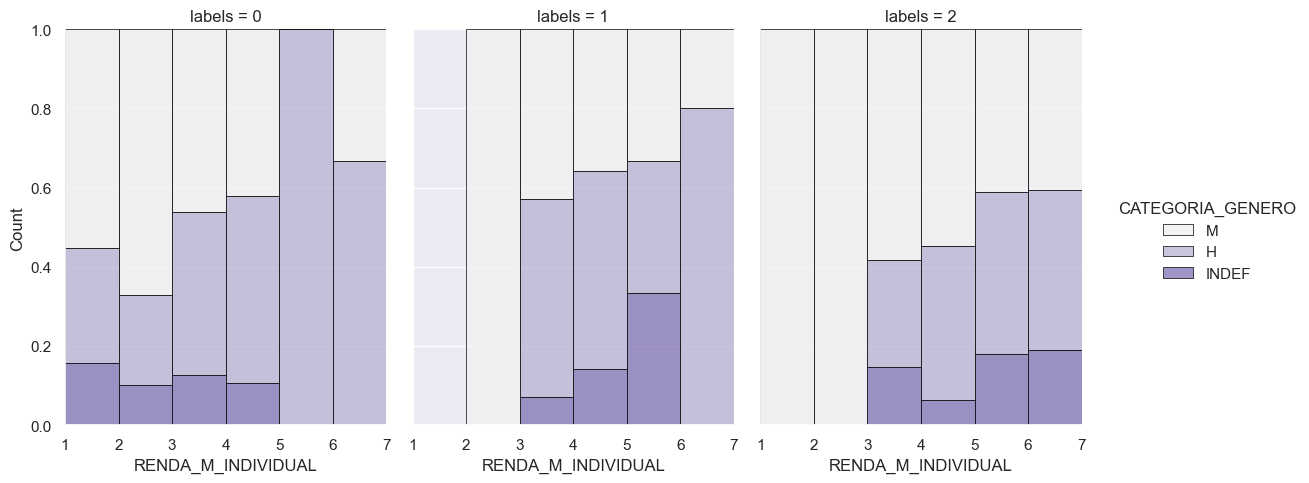

In [43]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="RENDA_M_INDIVIDUAL", col="labels", hue="CATEGORIA_GENERO",
    aspect=.75, linewidth=.5, palette='light:m', binwidth=1, multiple='fill', alpha=.75, edgecolor='black'
    #**kwargs_displot
)
arquivo = 'CLUSTER_1_RENDA_M_INDIV_CAT_GENERO_02_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


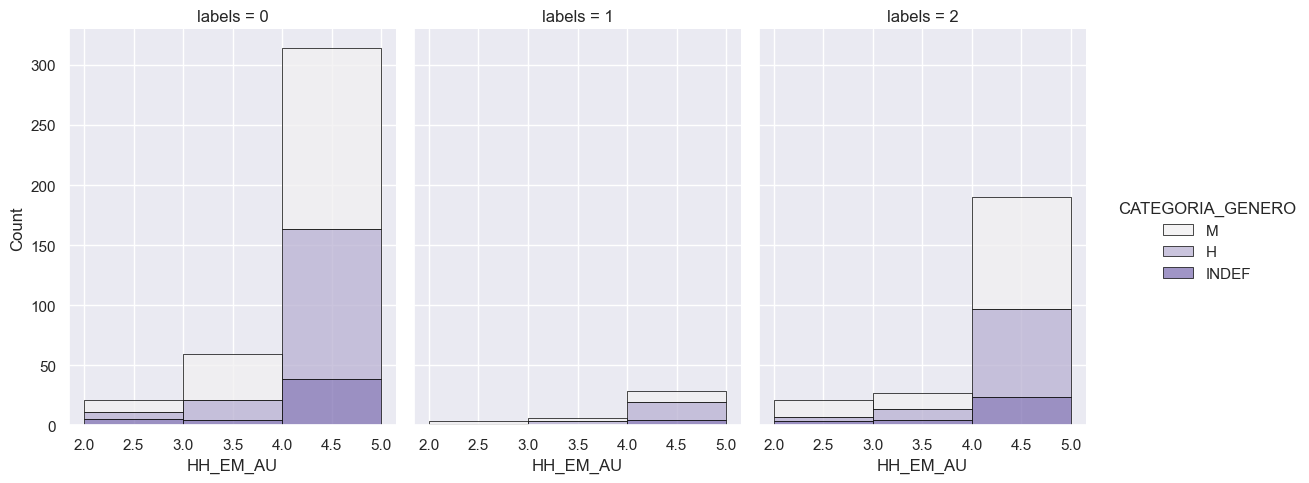

In [44]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="HH_EM_AU", col="labels", hue="CATEGORIA_GENERO",
    aspect=.75, linewidth=.5, palette='light:m', binwidth=1, multiple='stack', alpha=.75, edgecolor='black',kde=False
    #**kwargs_displot
)
arquivo = 'CLUSTER_2_HH_EM_AU_CAT_GENERO_01_STACK.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


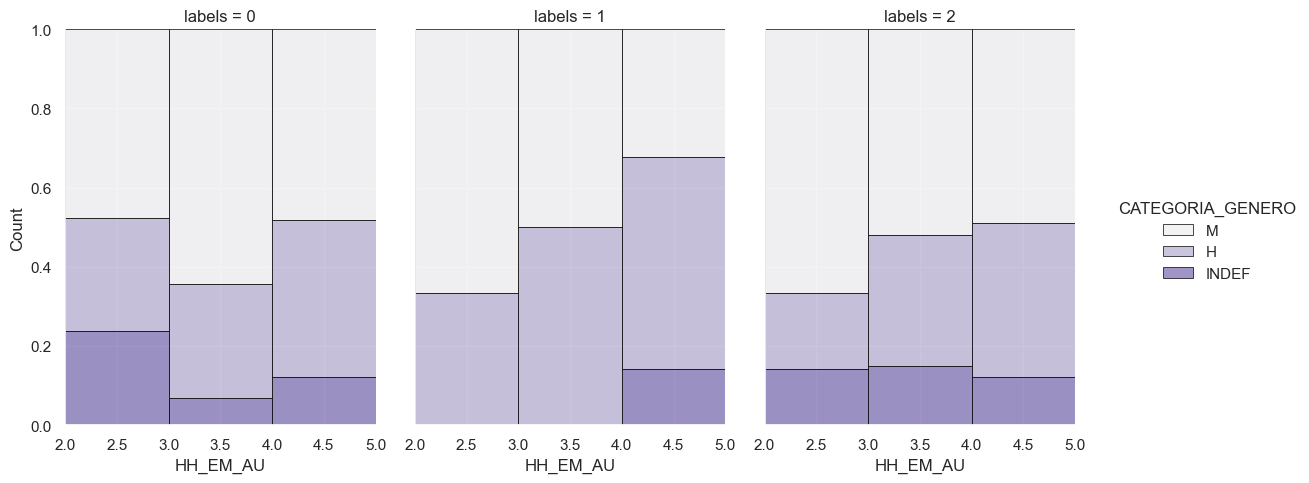

In [45]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="HH_EM_AU", col="labels", hue="CATEGORIA_GENERO",
    aspect=.75, linewidth=.5, palette='light:m', binwidth=1, multiple='fill', alpha=.75, edgecolor='black'
    #**kwargs_displot
)
arquivo = 'CLUSTER_2_HH_EM_AU_CAT_GENERO_02_FILL.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

In [46]:
colunas_atuacao = [coluna for coluna in df_4_analise.columns if coluna.startswith("ATUACAO_")]
resultados = []

filtro = 'labels'
for coluna in colunas_atuacao:
    resultado_coluna = df_4_analise[df_4_analise[coluna] == 1].groupby(filtro)[coluna].count()
    num_ocorrencias_por_label = df_4_analise.groupby(filtro)[coluna].sum()
    resultado_coluna = resultado_coluna / num_ocorrencias_por_label
    resultados.append(resultado_coluna)

df_resultados = pd.concat(resultados, axis=1)
df_resultados #Resultado com percentuais relativos ao dataset inteiro

,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
labels,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [47]:
colunas_atuacao = [coluna for coluna in df_4_analise.columns if coluna.startswith("ATUACAO_")]
resultados = []

filtro = 'labels'
for coluna in colunas_atuacao:
    resultado_coluna = df_4_analise[df_4_analise[coluna] == 1].groupby(filtro)[coluna].count()
    resultado_coluna = resultado_coluna / df_4_analise[coluna].sum()
    resultados.append(resultado_coluna)

df_resultados = pd.concat(resultados, axis=1)
df_resultados #Resultado com percentuais relativos ao dataset inteiro

,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
labels,,,,,,,,,,
0,0.673774,0.564286,0.580574,0.566667,0.6875,0.488372,0.538462,0.402174,0.545455,0.2500
1,0.027719,0.028571,0.041943,0.075000,0.0625,0.116279,0.076923,0.065217,0.045455,0.0125
2,0.298507,0.407143,0.377483,0.358333,0.2500,0.395349,0.384615,0.532609,0.409091,0.7375


In [112]:
def comparar_respostas(df):
    sns.set_theme(style="whitegrid")
    df_melted = df.melt(var_name='Campo', value_name='Respostas', ignore_index=False)
    #df_melted = df.melt(var_name='Campo', value_name='Respostas', ignore_index=False)
    plt.figure(figsize=(12, 4))
    sns.barplot(
        data=df_melted,
        x=df_melted.index,
        y='Respostas',
        hue='Campo',
        palette='Set2',
        #orient='x',
        )
    #plt.title('Comparação das respostas por gênero para cada campo de interesse')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.xticks(rotation=0)
    arquivo = 'AREAS_ATUACAO_CLUSTERS.png'
    plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')  
    plt.show()

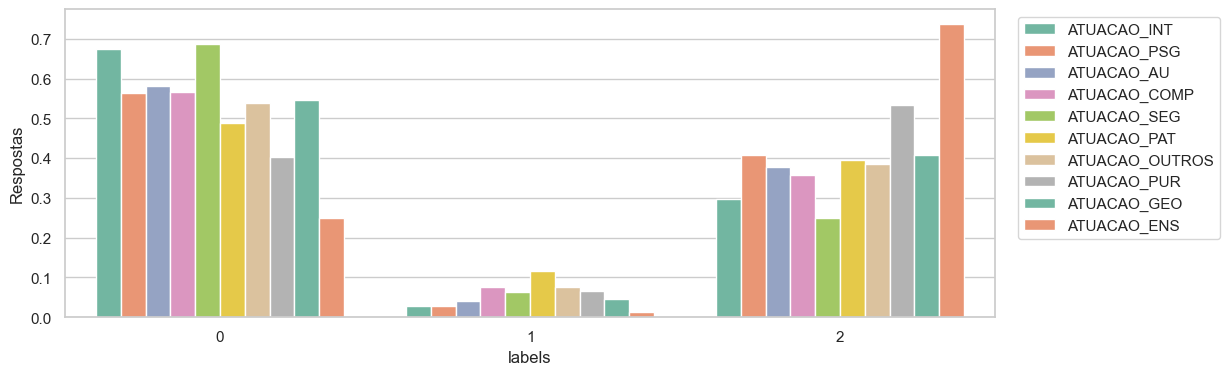

In [113]:
comparar_respostas(df_resultados)

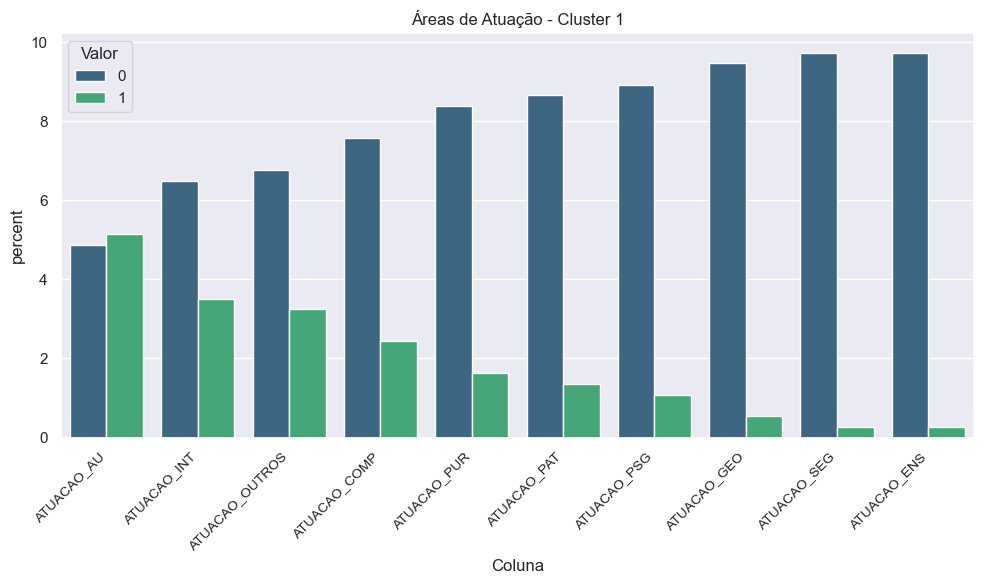

In [300]:
cluster_n = 1

atuacao_cols = [col for col in df_4_analise.columns if col.startswith("ATUACAO_")]
data = df_4_analise.query(f'CATEGORIA_GENERO == "H"')
data = df_4_analise.query(f'labels == {cluster_n}')
#data = df_4_analise
df_atuacao = data.filter(regex='^ATUACAO_')[atuacao_cols]
df_melted = df_atuacao.melt(var_name="Coluna", value_name="Valor")

count_ones = df_atuacao.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.countplot(
    df_melted, x="Coluna", hue="Valor",
    palette='viridis',
    order=count_ones.index,
    stat='percent',
    dodge=True
    )
plt.title(f"Áreas de Atuação - Cluster {cluster_n}")
#plt.xlabel("Colunas ATUACAO_")
#plt.ylabel("Contagem")
#plt.legend(title="Valor")
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.tight_layout()
#arquivo = fr'AREAS_DE_ATUACAO_COUNTPLOT_GERAL.png'
arquivo = fr'AREAS_DE_ATUACAO_COUNTPLOT_{cluster_n}.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')
plt.show()

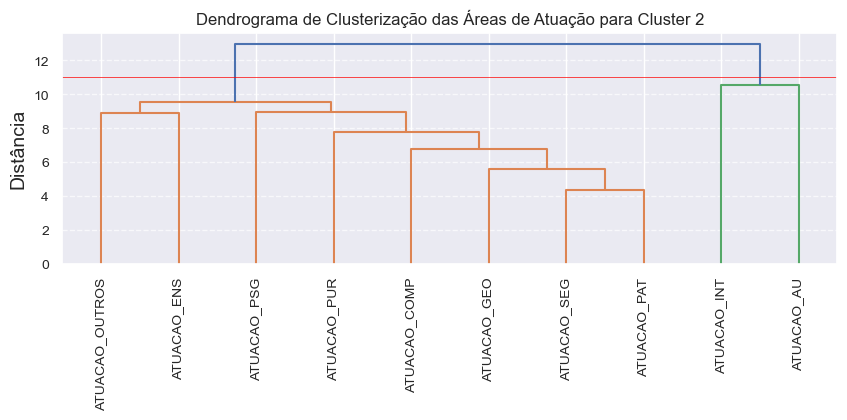

In [239]:
import seaborn as sns
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

valor = 0.85
cluster_n = 2
metrica = 'euclidean'

df_analise = df_4_analise[df_4_analise['labels'] == cluster_n]
#df_analise = df_4_analise.query("CATEGORIA_PJ == 'MISTA'")
colunas_atuacao = [coluna for coluna in df_analise.columns if coluna.startswith('ATUACAO_')]
df_atuacao = df_analise[colunas_atuacao]

matriz_distancia = hierarchy.distance.pdist(df_atuacao.T, metric=metrica)
distancia_maxima = matriz_distancia.max()
linkage = hierarchy.linkage(matriz_distancia, method='complete', metric=metrica)
plt.figure(figsize=(10, 3))
dendrogram = hierarchy.dendrogram(linkage, labels=df_atuacao.columns, leaf_rotation=90, leaf_font_size=10, color_threshold=(distancia_maxima*valor), distance_sort=True)

plt.title(f'Dendrograma de Clusterização das Áreas de Atuação para Cluster {cluster_n}')
plt.ylabel('Distância', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=(distancia_maxima*valor), color='red', linewidth=.5)
#arquivo = fr'CLUSTERS_HIERARQUICOS_ATUACAO_CLUSTER_{cluster_n}.png'
arquivo = fr'CLUSTERS_HIERARQUICOS_ATUACAO_GERAL_CLUSTER_{cluster_n}_{metrica.upper()}.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')
plt.show()

ATUACAO_INT - ATUACAO_INT
    0    1
0  98    0
1   0  140
ATUACAO_INT - ATUACAO_PSG
    0   1
0  85  96
1  13  44
ATUACAO_INT - ATUACAO_AU
    0    1
0  27   40
1  71  100
ATUACAO_INT - ATUACAO_COMP
    0    1
0  72  123
1  26   17
ATUACAO_INT - ATUACAO_SEG
    0    1
0  94  140
1   4    0
ATUACAO_INT - ATUACAO_PAT
    0    1
0  88  133
1  10    7
ATUACAO_INT - ATUACAO_OUTROS
    0    1
0  64  114
1  34   26
ATUACAO_INT - ATUACAO_PUR
    0    1
0  67  122
1  31   18
ATUACAO_INT - ATUACAO_GEO
    0    1
0  88  132
1  10    8
ATUACAO_INT - ATUACAO_ENS
    0    1
0  77  102
1  21   38
ATUACAO_PSG - ATUACAO_INT
    0   1
0  85  13
1  96  44
ATUACAO_PSG - ATUACAO_PSG
     0   1
0  181   0
1    0  57
ATUACAO_PSG - ATUACAO_AU
     0   1
0   55  12
1  126  45
ATUACAO_PSG - ATUACAO_COMP
     0   1
0  153  42
1   28  15
ATUACAO_PSG - ATUACAO_SEG
     0   1
0  177  57
1    4   0
ATUACAO_PSG - ATUACAO_PAT
     0   1
0  171  50
1   10   7
ATUACAO_PSG - ATUACAO_OUTROS
     0   1
0  134  44
1   47  

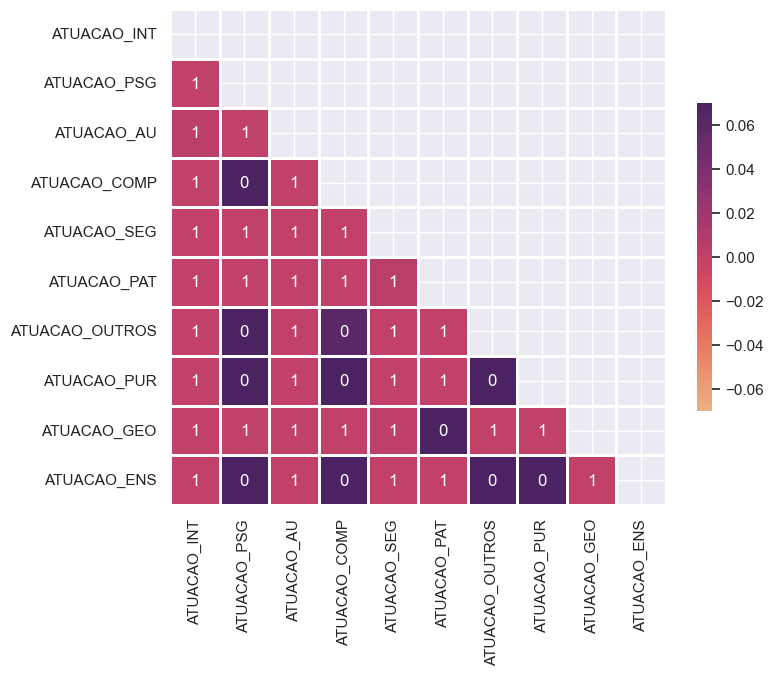

In [299]:
import numpy as np
from scipy.stats import fisher_exact
from scipy.stats import barnard_exact
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency

data = df_4_analise.query(f'labels == {cluster_n}').filter(regex='^ATUACAO_').astype(float)
df_pval = pd.DataFrame(index=data.columns, columns=data.columns)
df_statistic = pd.DataFrame(index=data.columns, columns=data.columns)

teste = mcnemar
nome_teste = 'MCNEMAR'
nivel_significancia = 0.05

for col1 in data.columns:
    for col2 in data.columns:
        if col1.startswith("ATUACAO_") and col2.startswith("ATUACAO_"):
            #crosstab = pd.crosstab(data[col1], data[col2])
            concordancia_ambos     = ((data[col1] == 1) & (data[col2] == 1)).sum()
            atuação_apenas_1       = ((data[col1] == 1) & (data[col2] == 0)).sum()
            atuação_apenas_2       = ((data[col1] == 0) & (data[col2] == 1)).sum()
            concordancia_nenhum    = ((data[col1] == 0) & (data[col2] == 0)).sum()
            crosstab_mcnemar = pd.DataFrame({
                0: [concordancia_nenhum, atuação_apenas_2],
                1: [atuação_apenas_1, concordancia_ambos]
                }, index=[0, 1])
            print(f'{col1} - {col2}')
            print(crosstab_mcnemar)

            res = mcnemar(crosstab_mcnemar, exact=True, correction=True)
            statistic = res.statistic
            p_value = res.pvalue

            df_pval.loc[col1, col2] = p_value
            df_statistic.loc[col1, col2] = statistic
            
df_pval_float = df_pval.astype(float)
df_statistic_float = df_statistic.astype(float)

#df_filtro = df_statistic_float[df_pval_float < 0.05].fillna(value='0').astype(float)

df_filtro = df_pval_float.copy()
def substituir_valor(valor):
    if valor < nivel_significancia:
        return 1#'H1'
    else:
        return 0
    
annotation_array = df_filtro.applymap(substituir_valor).values

mask = np.triu(np.ones_like(df_statistic_float, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))

sns.set_theme(style="darkgrid")
cmap = sns.color_palette("flare", as_cmap=True)

sns.heatmap(df_filtro, mask=mask, cmap=cmap, vmax=.07, vmin=-.07, center=0,
            annot=annotation_array, square=True, linewidths=.9, cbar_kws={"shrink": .5})#, fmt=".2f", annot_kws={"size": 10})

arquivo = f'AREAS_ATUACAO_TESTE_INDEPENDENCIA_{nome_teste.upper()}_SIGNIFICANCIA_{nivel_significancia*100}_CLUSTER_{cluster_n}.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

In [296]:
df_pval

,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
ATUACAO_INT,NaN,0.0,0.003257,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATUACAO_PSG,0.0,NaN,0.0,0.094264,0.0,0.0,0.753152,0.371093,0.000001,0.827259
ATUACAO_AU,0.003257,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATUACAO_COMP,0.0,0.094264,0.0,NaN,0.0,0.000126,0.046624,0.438578,0.000138,0.080856
ATUACAO_SEG,0.0,0.0,0.0,0.0,NaN,0.00286,0.0,0.0,0.001745,0.0
ATUACAO_PAT,0.0,0.0,0.0,0.000126,0.00286,NaN,0.0,0.000004,0.857462,0.0
ATUACAO_OUTROS,0.0,0.753152,0.0,0.046624,0.0,0.0,NaN,0.232823,0.000001,0.91042
ATUACAO_PUR,0.0,0.371093,0.0,0.438578,0.0,0.000004,0.232823,NaN,0.000004,0.275234
ATUACAO_GEO,0.0,0.000001,0.0,0.000138,0.001745,0.857462,0.000001,0.000004,NaN,0.000001
ATUACAO_ENS,0.0,0.827259,0.0,0.080856,0.0,0.0,0.91042,0.275234,0.000001,NaN


Teste Exato de Fisher: A hipótese nula é que as duas variáveis são independentes, ou seja, a distribuição das células na tabela de contingência é atribuída ao acaso.

Teste de Barnard: Da mesma forma que o teste de Fisher, a hipótese nula é que não há associação entre as duas variáveis.

Teste Qui-Quadrado de Pearson: A hipótese nula é que não há associação entre as duas variáveis na população subjacente; em outras palavras, as duas variáveis são independentes.

Fisher

The null hypothesis is that the true odds ratio of the populations underlying the observations is one, and the observations were sampled from these populations under a condition: the marginals of the resulting table must equal those of the observed table.

H0 : p1 = p2

The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, and __the p-value is the probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed.__ There are other possible choices of statistic and two-sided p-value definition associated with Fisher’s exact test; please see the Notes for more information.

<Axes: xlabel='labels', ylabel='RENDA_M_INDIVIDUAL'>

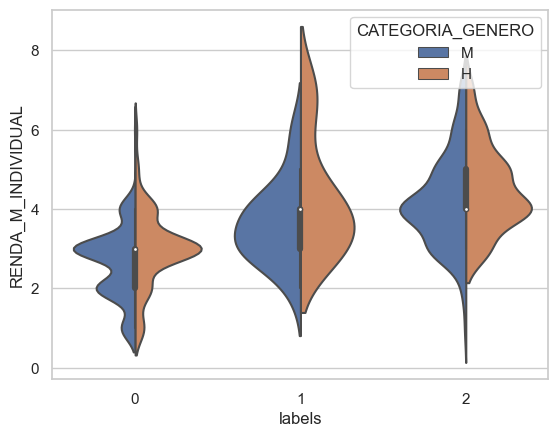

In [50]:
#plt.figure(figsize=figsize_hist)
#plt.yticks(dict_ticks['HH_EM_AU'][0], dict_ticks['HH_EM_AU'][1], rotation=0)
sns.violinplot(
    #data=df_selecao[['RENDA_M_INDIVIDUAL','CATEGORIA_IDADE','CATEGORIA_GENERO']].query('CATEGORIA_GENERO' == "H" or 'CATEGORIA_GENERO == "M"')['RENDA_M_INDIVIDUAL'],
    data=df_4_analise[['RENDA_M_INDIVIDUAL','labels','CATEGORIA_GENERO']].query('CATEGORIA_GENERO == "H" or CATEGORIA_GENERO == "M"'),
    y="RENDA_M_INDIVIDUAL", x="labels", hue="CATEGORIA_GENERO", split=True
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


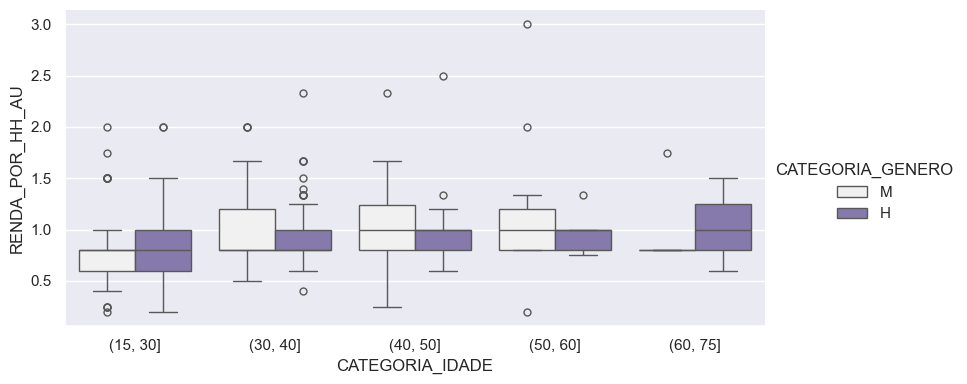

In [591]:
var = "RENDA_POR_HH_AU"
filtro = "CATEGORIA_GENERO"
sns.catplot(
    data=df_4_analise.query('CATEGORIA_GENERO != "INDEF"'),
    x="CATEGORIA_IDADE",
    y=var,
    hue=filtro,
    kind="box",
    height=4,
    aspect=2,
    palette='light:m'
    )
arquivo = fr'{var}_{filtro.upper()}_BOXPLOT_CLUSTERS.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')
plt.show()

<Axes: xlabel='RENDA_POR_HH_AU', ylabel='Proportion'>

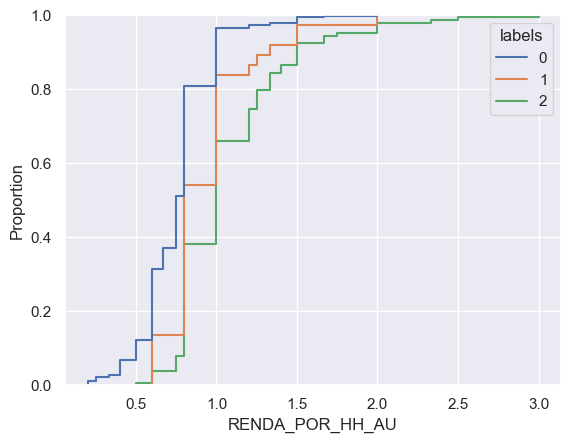

In [51]:
sns.set_theme(style="darkgrid")
sns.ecdfplot(
    df_4_analise, x="RENDA_POR_HH_AU", hue='labels', 
    linewidth=1.5, palette='deep', stat='proportion', complementary=False
    #**kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


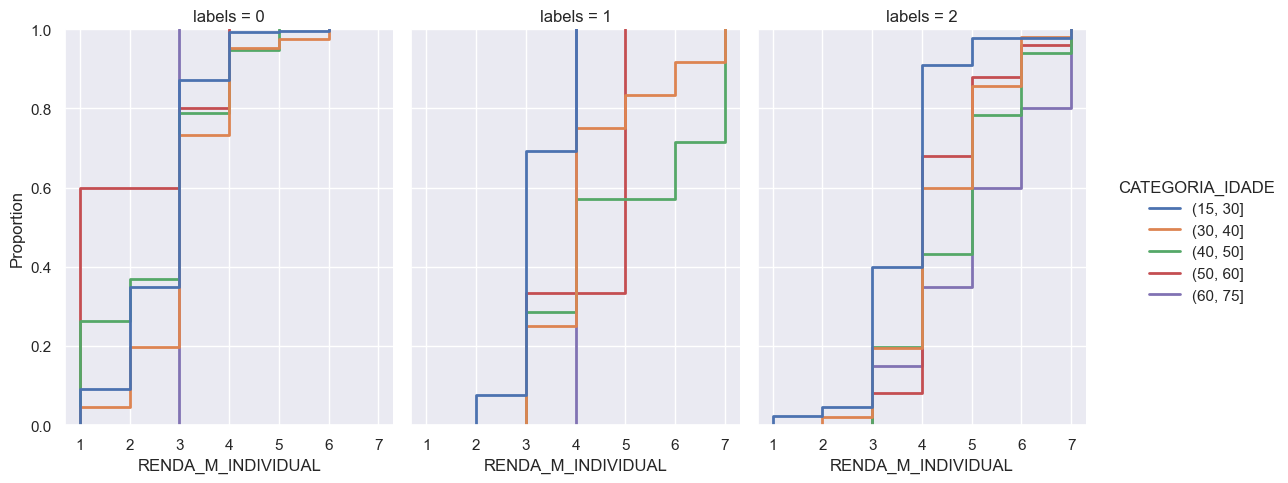

In [52]:
sns.displot(
    df_4_analise,
    x="RENDA_M_INDIVIDUAL", col="labels", hue="CATEGORIA_IDADE",
    kind="ecdf", aspect=.75, linewidth=2, palette='deep',
)

In [53]:
diretorio_img_replot = f'{diretorio_img}\\RELPLOT'

In [86]:
dict_ticks = {}

# Adicionando itens ao dicionário
#dict_ticks['FONTE_RENDA_AU'] = ([0, 1, 2, 3, 4, 5, 6], ['<= 1 SM', '1-3 SM', '3-6 SM', '6-9 SM', '9-12 SM', '12-15 SM', '> 15 SM'])
dict_ticks['RENDA_M_INDIVIDUAL'] = ([0, 1, 2, 3, 4, 5, 6], ['<= 1 SM', '1-3 SM', '3-6 SM', '6-9 SM', '9-12 SM', '12-15 SM', '> 15 SM'])
dict_ticks['HH_EM_AU'] = ([0, 1, 2, 3, 4, 5], ['Esporadicamente', 'até 10h', '10-20h', '20-30h', '30-40h', '> 40h'])
dict_ticks['INDICE_PROJ_OBRA'] = ([0, 1, 2, 3, 4, 5], ['Aprov/PB', 'EX', 'CO Comp.', 'Autoria Comp.', 'Fisc. Obra', 'EX Obra'])


In [352]:
color_dict_outer = {'CATEGORIA_GENERO': {'M': 0.0, 'H': 1.0, 'INDEF': 0.5},
                    'CATEGORIA_PJ': {'NAO': 0.2, 'UNI': 0.4, 'MISTA': 0.8},
                    'ESCOLARIDADE': {'1': .05, '2': .15, '3': .25, '4': .35, '5': .45},
                    'CATEGORIA_IDADE': {'(15, 30]': .0, '(30, 40]': .2, '(40, 50]': .5, '(50, 60]': .6, '(60, 75]': .8,}}


In [369]:
color_dict_outer['CATEGORIA_GENERO']

{'M': 0.0, 'H': 1.0, 'INDEF': 0.5}

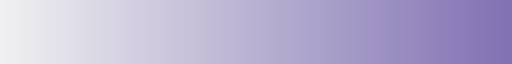

In [370]:
filtro="CATEGORIA_GENERO"
filtro_paleta="light:m"
#filtro="CATEGORIA_PJ"
#filtro_paleta='viridis'
#filtro="ESCOLARIDADE"
#filtro_paleta="tab10"
#filtro="CATEGORIA_IDADE"
#filtro_paleta="flare"
gradient_palette = sns.color_palette(filtro_paleta, as_cmap=True)
gradient_palette

In [371]:
color_dict_inner = {}

for item, value in color_dict_outer[filtro].items():
    print(item)
    print(value)
    cor = gradient_palette(value)
    color_dict_inner[item] = cor

color_dict_inner

M
0.0
H
1.0
INDEF
0.5


{'M': (0.9437618481521186, 0.9430412099633052, 0.9470529597683014, 1.0),
 'H': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254, 1.0),
 'INDEF': (0.7239635133011358, 0.6940775022631548, 0.8240262991479652, 1.0)}

In [354]:
gradient_palette(.1)

(0.9008324858765361, 0.8944154858031196, 0.923024315115892, 1.0)

In [394]:
list(color_dict_inner.keys())

['M', 'H', 'INDEF']

In [422]:
dict_ticks[var]
dicionario_rotulos = dict(zip(*dict_ticks[var]))

In [423]:
dicionario_rotulos

{0: 'Esporadicamente',
 1: 'até 10h',
 2: '10-20h',
 3: '20-30h',
 4: '30-40h',
 5: '> 40h'}

In [ ]:
[dicionario_rotulos.get(label, label) for label in tupla_rotulos[0]])

In [440]:
dict_ticks[var][0]

[0, 1, 2, 3, 4, 5]

In [513]:
filtro="CATEGORIA_GENERO"
filtro_paleta="light:m"
#filtro="CATEGORIA_PJ"
#filtro_paleta='viridis'
#filtro="ESCOLARIDADE"
#filtro_paleta="tab10"
#filtro="CATEGORIA_IDADE"
#filtro_paleta="flare"
color_dict_inner = {}
for item, value in color_dict_outer[filtro].items():
    cor = gradient_palette(value)
    color_dict_inner[item] = cor

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


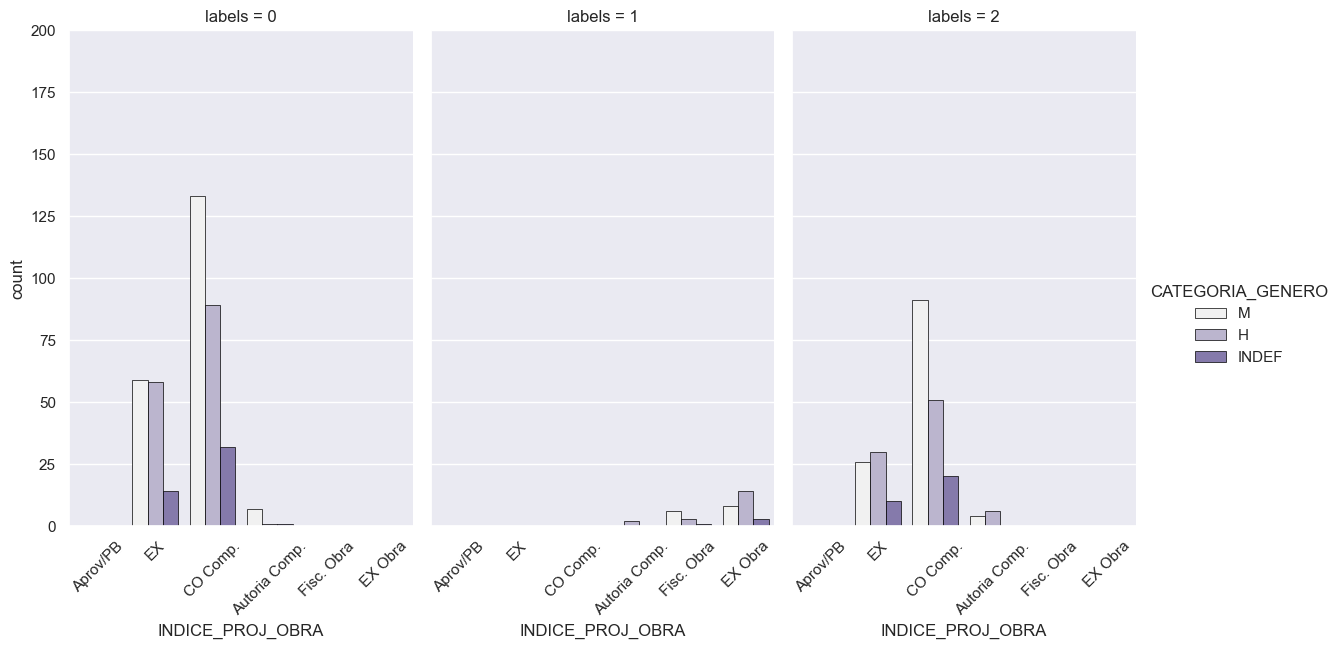

In [514]:
var = 'INDICE_PROJ_OBRA'
dicionario_rotulos = dict(zip(*dict_ticks[var]))
g = sns.catplot(
    data=df_4_analise,
    x=var,
    kind="count",
    hue=filtro,
    palette=filtro_paleta,
    col='labels',
    linewidth=.5,
    edgecolor='black',
    hue_order=list(color_dict_inner.keys()),
    height=6,
    aspect=.65,
    legend=True,
    legend_out=True,
    order=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
)
#g.plt.xticks(ticks=dict_ticks[var][0], labels=[dicionario_rotulos.get(label, label) for label in dict_ticks[var][0]], rotation=45)
g.set_xticklabels(labels=[dicionario_rotulos.get(label, label) for label in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]], rotation=45)
g.set(ylim=(0, 200))
arquivo = fr'{var}_{filtro.upper()}_CATPLOT_CLUSTERS.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')
plt.show()


[(0.9437618481521186, 0.9430412099633052, 0.9470529597683014, 1.0), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254, 1.0), (0.7239635133011358, 0.6940775022631548, 0.8240262991479652, 1.0)]
HH_EM_AU
HH_EM_AU
HH_EM_AU


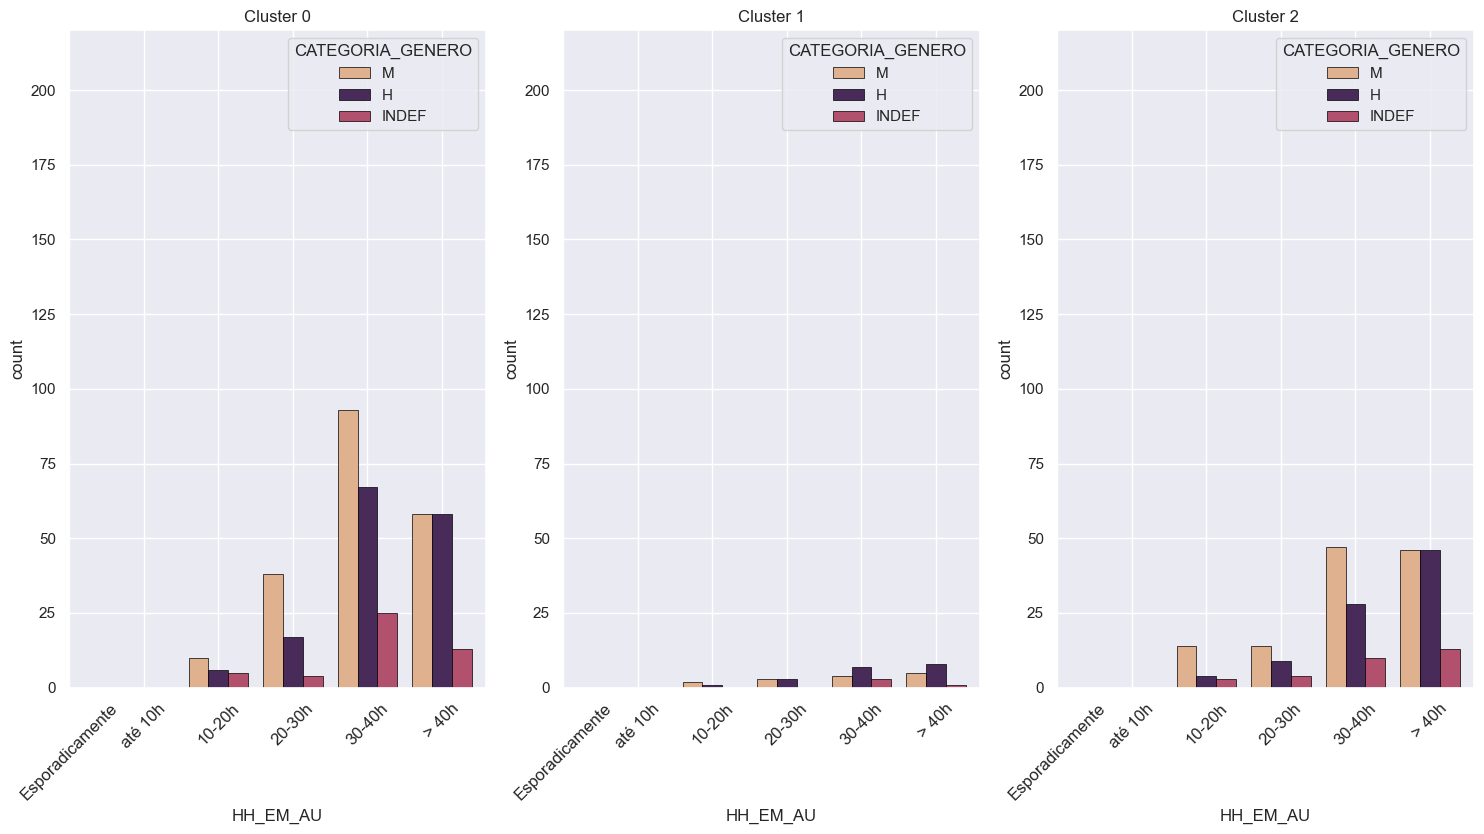

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt

num_rows = 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8.5))
axes = axes.ravel()

max_count = 220
var = ['HH_EM_AU']

gradient_palette = sns.color_palette(filtro_paleta, as_cmap=True)
val_palette = [gradient_palette(color_dict_outer[filtro][value]) for value, _ in color_dict_outer[filtro].items()]

print(val_palette)
for i, col in enumerate(var * num_cols):
    print(col)
    sns.countplot(
        data=df_4_analise.query(f'labels == {i}'),
        x=col,
        hue=filtro,
        hue_order=list(color_dict_inner.keys()),
        #palette=val_palette,
        palette=color_dict_inner,
        legend=True,
        native_scale=True,
        stat='count',
        ax=axes[i],
        linewidth=.5,
        edgecolor='black'
        )
    axes[i].set_ylim(0, max_count)
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xticks(dict_ticks[var[0]][0])
    axes[i].set_xticklabels(dict_ticks[var[0]][1], rotation=45, fontsize=12)

plt.tight_layout()
arquivo = fr'{var[0]}_{filtro.upper()}_COUNTPLOT_CLUSTERS.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')
plt.show()

In [316]:
diretorio_img_replot = f'{diretorio_img}\RELPLOT'
diretorio_img_replot

'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS\\CLUSTERIZACAO\\RELPLOT'

In [526]:
#filtro="CATEGORIA_GENERO"
#filtro_paleta="light:m"
filtro="CATEGORIA_PJ"
filtro_paleta='viridis'
#filtro="ESCOLARIDADE"
#filtro_paleta="tab10"
#filtro="CATEGORIA_IDADE"
#filtro_paleta="flare"

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


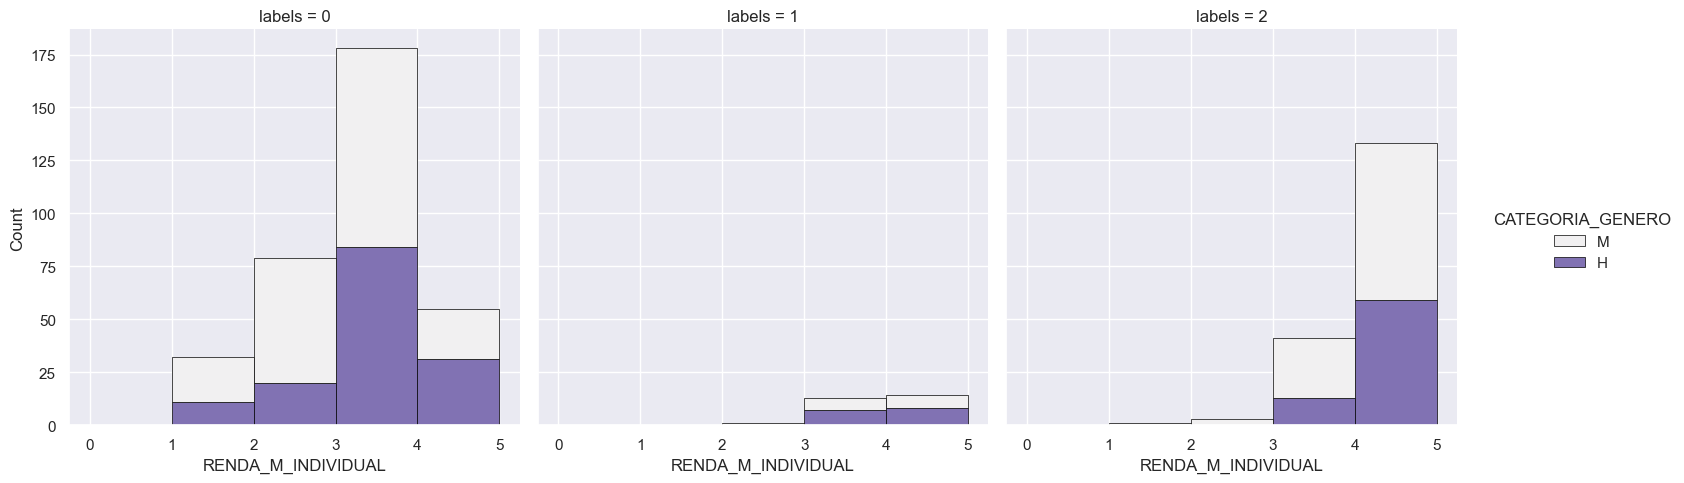

In [560]:
#plt.xticks(dict_ticks['RENDA_M_INDIVIDUAL'][0], dict_ticks['RENDA_M_INDIVIDUAL'][1], rotation=0)
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise.query(f'CATEGORIA_GENERO != "INDEF"'), x="RENDA_M_INDIVIDUAL", col="labels", hue=filtro,
    aspect=1, linewidth=.5, palette=filtro_paleta, binwidth=1, binrange=(0,5), multiple='stack', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_RENDA_M_INDIVIDUAL_{filtro}_STACK.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


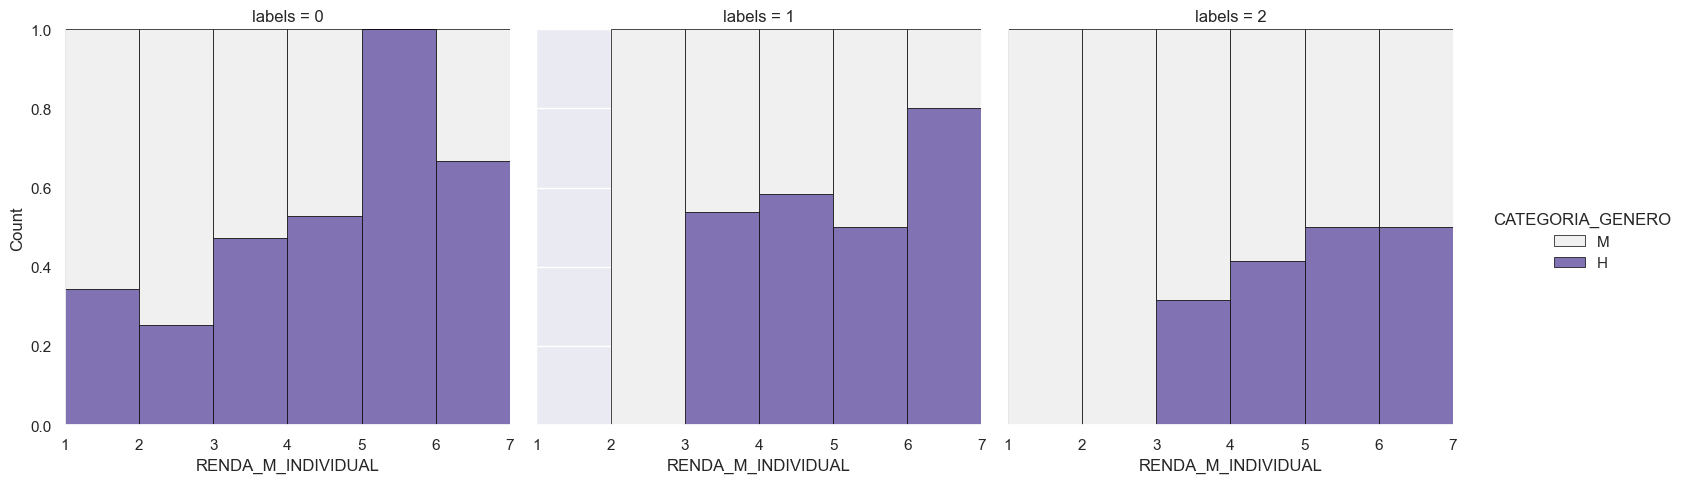

In [561]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise.query(f'CATEGORIA_GENERO != "INDEF"'), x="RENDA_M_INDIVIDUAL", col="labels", hue=crit,
    aspect=1, linewidth=.5, palette=cor, binwidth=1, multiple='fill', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_RENDA_M_INDIVIDUAL_{filtro}_FILL.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

In [555]:
filtro="CATEGORIA_GENERO"
filtro_paleta="light:m"
#filtro="CATEGORIA_PJ"
#filtro_paleta='viridis'
#filtro="ESCOLARIDADE"
#filtro_paleta="tab10"
#filtro="CATEGORIA_IDADE"
#filtro_paleta="flare"

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


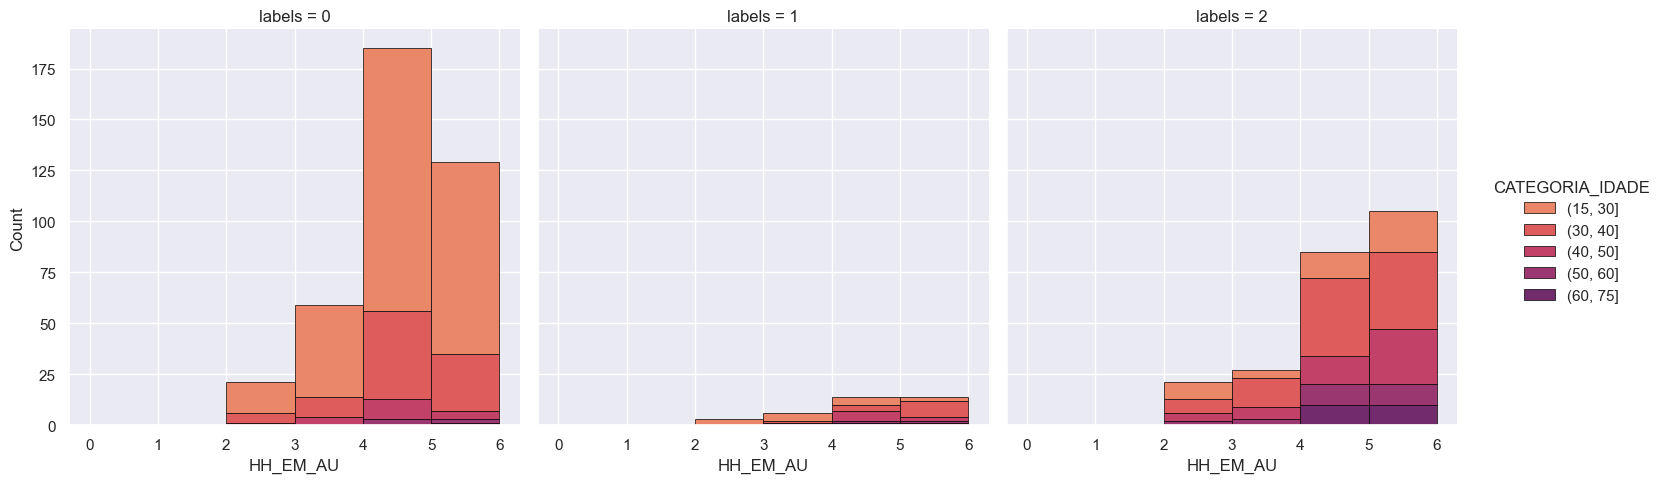

In [553]:
#plt.xticks(dict_ticks['RENDA_M_INDIVIDUAL'][0], dict_ticks['RENDA_M_INDIVIDUAL'][1], rotation=0)
sns.set_theme(style="darkgrid")
sns.displot(
    #.query(f'CATEGORIA_GENERO != "INDEF"')
    df_4_analise, x="HH_EM_AU", col="labels", hue=filtro,
    aspect=1, linewidth=.5, palette=filtro_paleta, binwidth=1, binrange=(0,6), multiple='stack', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_HH_EM_AU_{filtro}_STACK.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


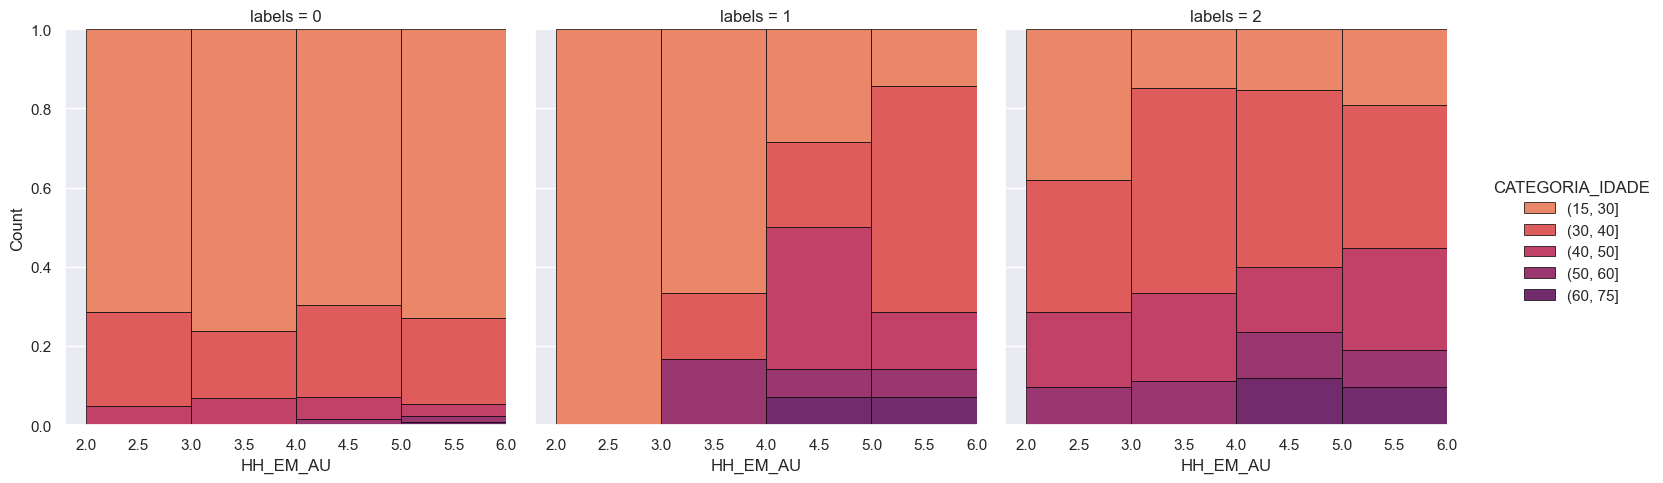

In [554]:
sns.set_theme(style="darkgrid")
sns.displot(
    #.query(f'CATEGORIA_GENERO != "INDEF"')
    df_4_analise, x="HH_EM_AU", col="labels", hue=filtro,
    aspect=1, linewidth=.5, palette=filtro_paleta, binwidth=1, binrange=(0,6), multiple='fill', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_HH_EM_AU_{filtro}_FILL.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

In [556]:
crit="CATEGORIA_GENERO"
cor="light:m"
#crit="CATEGORIA_PJ"
#cor='viridis'
#crit="ESCOLARIDADE"
#cor="tab10"
#crit="CATEGORIA_IDADE"
#cor="flare"

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


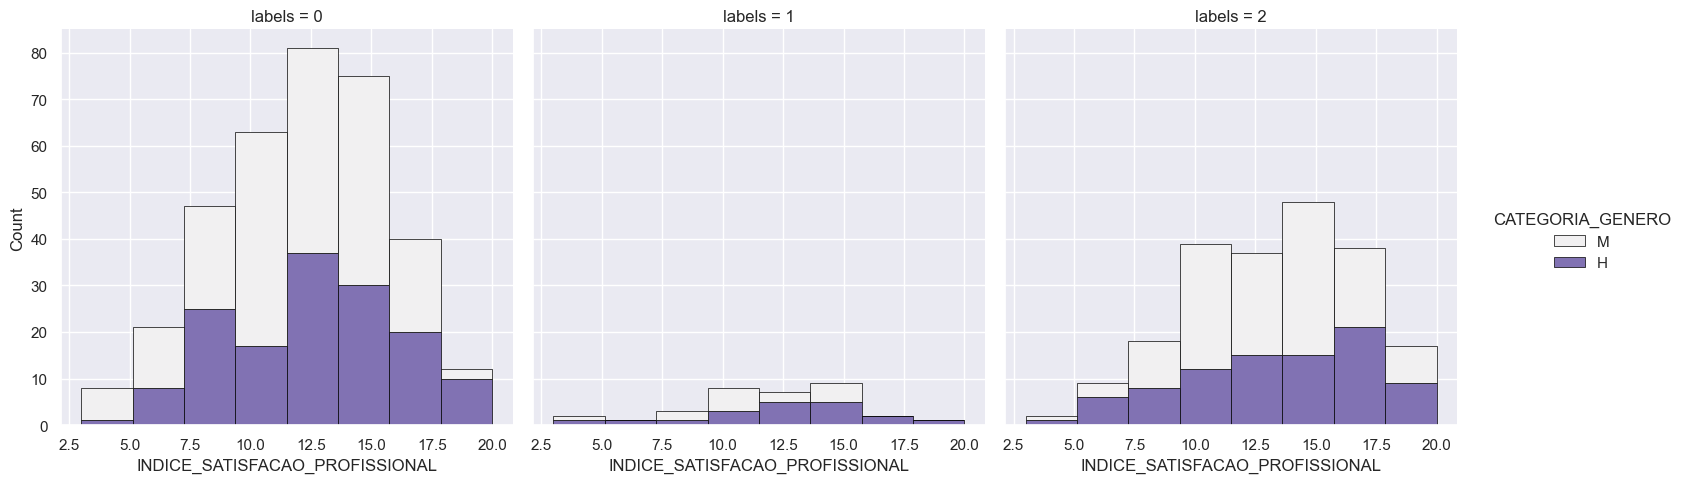

In [557]:
#plt.xticks(dict_ticks['RENDA_M_INDIVIDUAL'][0], dict_ticks['RENDA_M_INDIVIDUAL'][1], rotation=0)
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise.query(f'CATEGORIA_GENERO != "INDEF"'), x="INDICE_SATISFACAO_PROFISSIONAL", col="labels", hue=crit,
    aspect=1, linewidth=.5, palette=cor, binwidth=2, multiple='stack', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_INDICE_SATISFACAO_PROFISSIONAL_{crit}_STACK.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


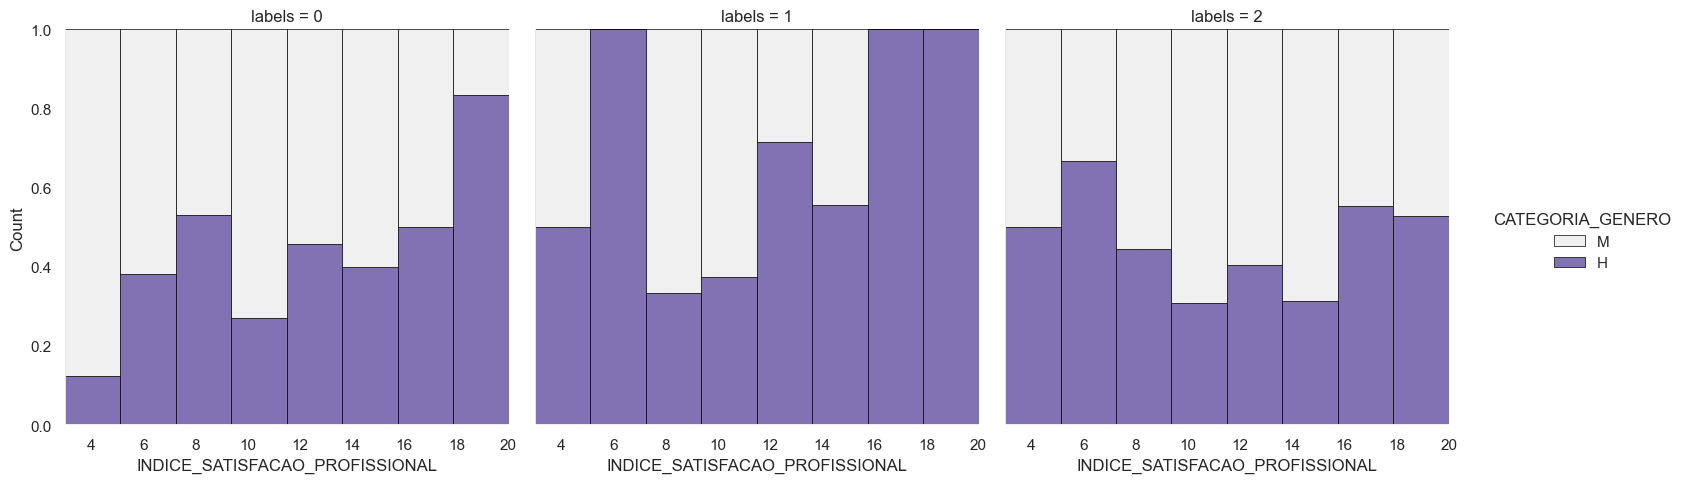

In [558]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise.query(f'CATEGORIA_GENERO != "INDEF"'), x="INDICE_SATISFACAO_PROFISSIONAL", col="labels", hue=crit,
    aspect=1, linewidth=.5, palette=cor, binwidth=2, multiple='fill', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_INDICE_SATISFACAO_PROFISSIONALU_{crit}_FILL.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

In [97]:
#crit="CATEGORIA_GENERO"
#cor="light:m"
#crit="CATEGORIA_PJ"
#cor='viridis'
#crit="ESCOLARIDADE"
#cor="tab10"
crit="CATEGORIA_IDADE"
cor="flare"

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


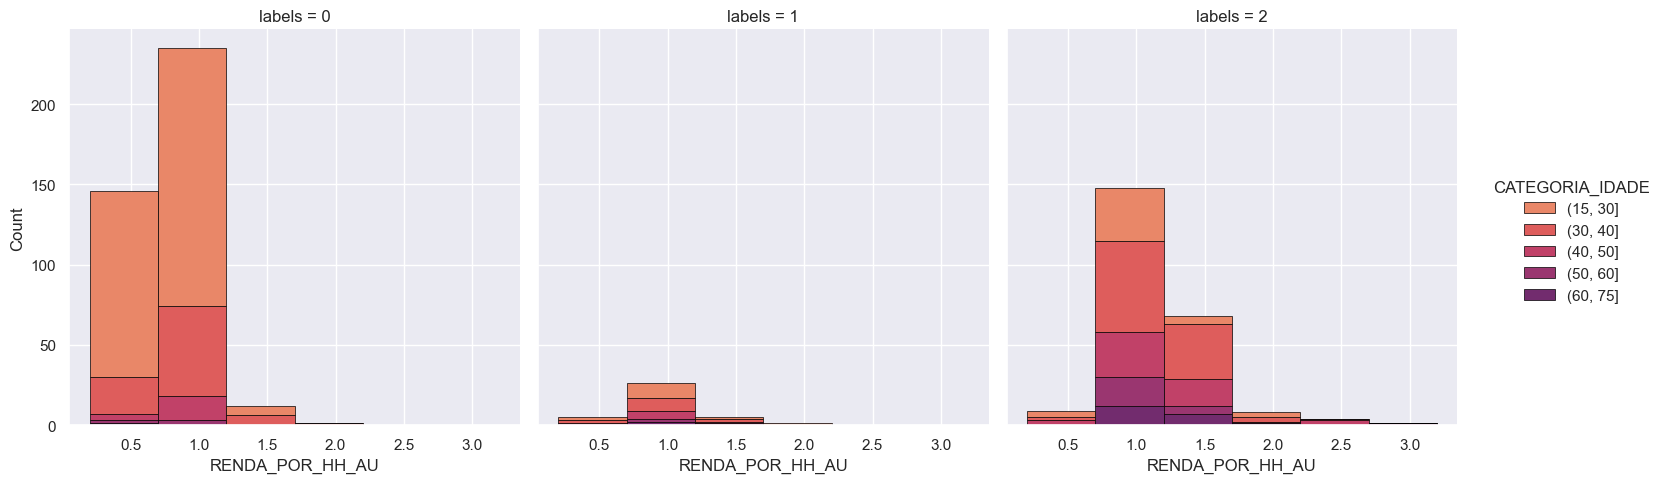

In [98]:
#plt.xticks(dict_ticks['RENDA_M_INDIVIDUAL'][0], dict_ticks['RENDA_M_INDIVIDUAL'][1], rotation=0)
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="RENDA_POR_HH_AU", col="labels", hue=crit,
    aspect=1, linewidth=.5, palette=cor, binwidth=.5, multiple='stack', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_RENDA_POR_HH_AU_{crit}_STACK.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


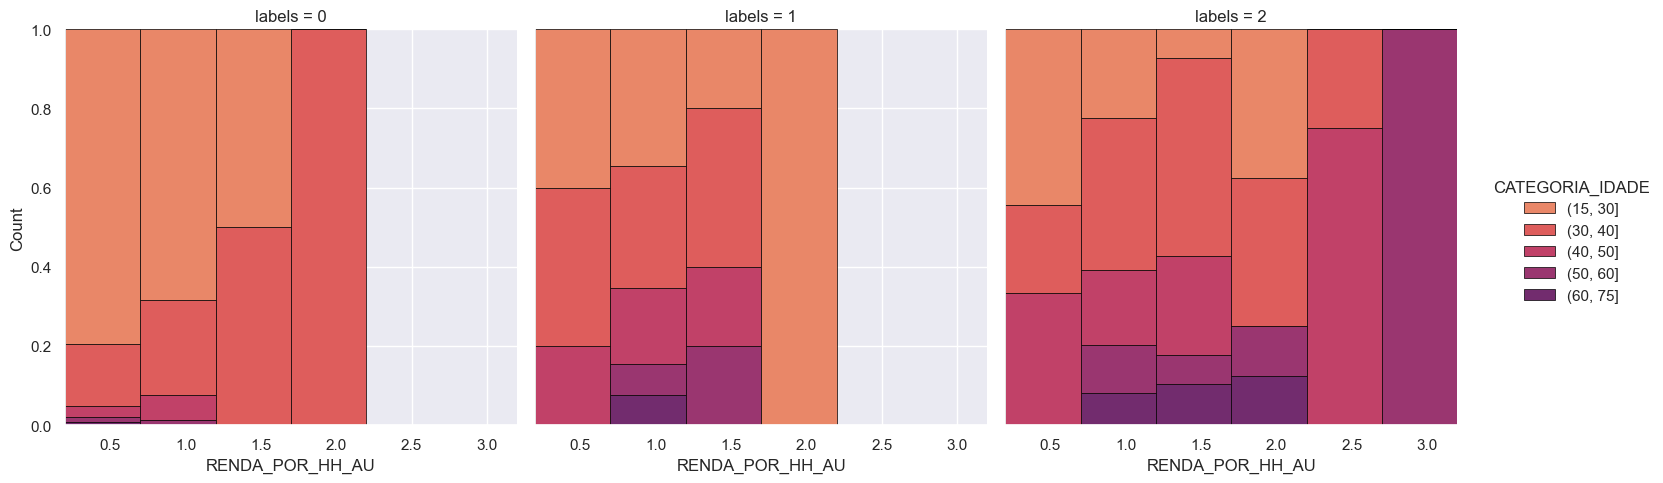

In [99]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_4_analise, x="RENDA_POR_HH_AU", col="labels", hue=crit,
    aspect=1, linewidth=.5, palette=cor, binwidth=.5, multiple='fill', alpha=1, edgecolor='black'
    #**kwargs_displot
)
arquivo = f'CLUSTER_RENDA_POR_HH_AU_{crit}_FILL.png'
plt.savefig(os.path.join(diretorio_img_replot, arquivo), bbox_inches='tight')

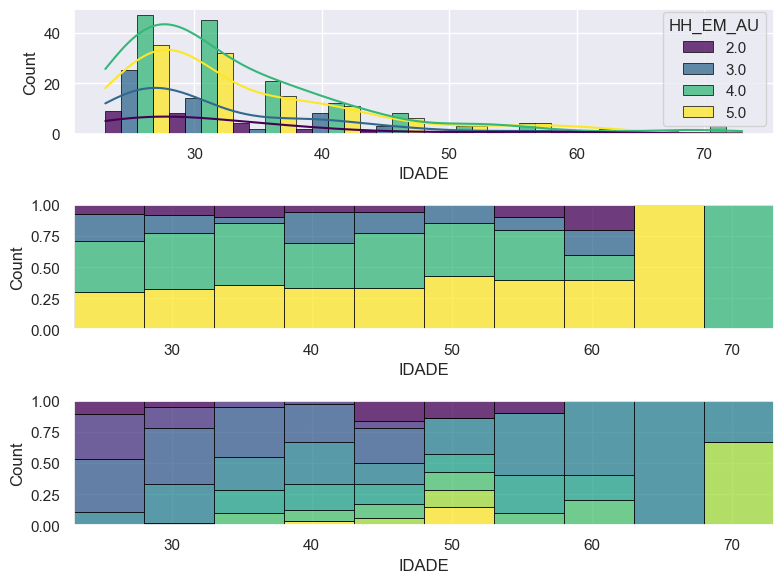

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
dados2 = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6]

# Plotando o primeiro sns.displot
sns.histplot(
    df_4_analise.query("CATEGORIA_GENERO == 'M'"), x="IDADE", hue="HH_EM_AU",
    linewidth=.5, palette='viridis', binwidth=5, multiple='dodge', alpha=.75, edgecolor='black',
    kde=True, ax=axs[0]
    )
sns.histplot(    
    df_4_analise.query("CATEGORIA_GENERO == 'M'"), x="IDADE", hue="HH_EM_AU",
    linewidth=.5, palette='viridis', binwidth=5, multiple='fill', alpha=.75, edgecolor='black',
    kde=False, ax=axs[1], legend=False
    )
sns.histplot(    
    df_4_analise.query("CATEGORIA_GENERO == 'M'"), x="IDADE", hue="RENDA_M_INDIVIDUAL",
    linewidth=.5, palette='viridis', binwidth=5, multiple='fill', alpha=.75, edgecolor='black',
    kde=False, ax=axs[2], legend=False
    )
plt.tight_layout()
plt.show()

In [107]:
df_4_analise.groupby('labels')['ESCOLARIDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,2.124324,0.346885,2.0,2.0,2.0,2.0,4.0
1,89.0,1.932584,0.750723,1.0,1.0,2.0,2.0,4.0
2,34.0,1.441176,0.503995,1.0,1.0,1.0,2.0,2.0
3,55.0,1.418182,0.567350,1.0,1.0,1.0,2.0,3.0
4,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [35]:
df_4_analise.groupby('labels')['FONTE_RENDA_NAO_AU'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,0.259459,0.518914,0.0,0.0,0.0,0.0,3.0
1,89.0,0.112360,0.351562,0.0,0.0,0.0,0.0,2.0
2,34.0,0.352941,0.485071,0.0,0.0,0.0,1.0,1.0
3,55.0,0.254545,0.479899,0.0,0.0,0.0,0.0,2.0
4,306.0,0.163399,0.387637,0.0,0.0,0.0,0.0,2.0


In [36]:
df_4_analise.groupby('labels')['IDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,33.248649,7.445659,24.0,28.0,31.0,37.0,60.0
1,89.0,46.820225,11.983475,28.0,38.0,43.0,55.0,73.0
2,34.0,37.323529,11.022623,24.0,29.0,36.0,42.5,66.0
3,55.0,30.963636,5.577613,24.0,27.0,29.0,34.0,49.0
4,306.0,30.895425,8.286796,23.0,26.0,28.0,33.0,67.0


In [39]:
df_4_analise.groupby('labels')['RENDA_M_FAMILIAR'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,4.800000,1.443878,2.0,4.0,5.0,6.00,8.0
1,89.0,6.662921,1.186513,3.0,6.0,7.0,8.00,8.0
2,34.0,5.176471,1.336449,4.0,4.0,5.0,5.75,8.0
3,55.0,4.781818,1.547889,3.0,4.0,4.0,6.00,8.0
4,306.0,4.457516,1.553365,1.0,3.0,4.0,5.00,8.0


In [43]:
df_4_analise.groupby('labels')['HH_EM_AU'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,4.075676,0.905720,2.0,4.0,4.0,5.0,5.0
1,89.0,4.112360,1.038336,2.0,3.0,4.0,5.0,5.0
2,34.0,4.088235,0.900089,2.0,4.0,4.0,5.0,5.0
3,55.0,4.200000,0.755229,2.0,4.0,4.0,5.0,5.0
4,306.0,4.091503,0.828663,2.0,4.0,4.0,5.0,5.0


In [114]:
df_4_analise.groupby('labels')['INDICE_SATISFACAO_PROFISSIONAL'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,185.0,12.297297,3.174841,4.0,10.0,12.0,15.00,20.0
1,89.0,13.820225,3.578858,5.0,11.0,15.0,16.00,20.0
2,34.0,11.705882,3.786174,3.0,10.0,12.5,14.75,18.0
3,55.0,11.090909,3.092840,3.0,9.0,12.0,13.00,17.0
4,306.0,12.323529,3.159669,3.0,10.0,12.0,14.00,19.0


In [115]:
df_4_analise.groupby('labels')['ATUACAO_ENS'].agg(['sum', 'count', 'mean'])

,sum,count,mean
labels,,,
0,37,185,0.200000
1,24,89,0.269663
2,1,34,0.029412
3,6,55,0.109091
4,12,306,0.039216


In [129]:
df_4_analise.groupby('labels')['ATUACAO_INT'].agg(['sum', 'count', 'mean'])

,sum,count,mean
labels,,,
0,198,252,0.785714
1,88,128,0.687500
2,11,31,0.354839
3,50,91,0.549451
4,122,167,0.730539


In [130]:
df_4_analise.groupby('labels')['ATUACAO_AU'].agg(['sum', 'count', 'mean'])

,sum,count,mean
labels,,,
0,182,252,0.722222
1,94,128,0.734375
2,15,31,0.483871
3,64,91,0.703297
4,98,167,0.586826


In [17]:
df_atuacao

,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
32,0,0,1,0,0,0,0,0,0,0
414,1,1,0,0,0,0,0,0,0,0
441,1,0,1,0,0,0,0,0,0,0
522,1,1,0,0,0,0,0,0,0,0
602,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44996,1,1,1,0,0,0,1,0,0,0
45032,1,0,0,0,0,0,1,0,0,0
45137,1,1,0,0,0,0,1,0,0,1
45271,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='labels', ylabel='RENDA_M_INDIVIDUAL'>

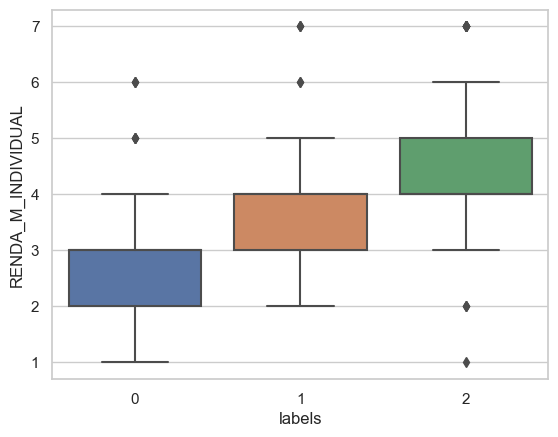

In [114]:
sns.set_theme(style="whitegrid")
sns.boxplot(
    data=df_4_analise,
    x="labels",
    y="RENDA_M_INDIVIDUAL",
    dodge=False,
    #hue='viridis',
    #palette='deck'
    )

In [132]:
df_4_analise.loc[(df_4_analise.labels == 2)]

,IDADE,RENDA_M_INDIVIDUAL,RENDA_M_FAMILIAR,RENDA_FONTE_ASSALARIADO1,RENDA_FONTE_ASSALARIADO4,RENDA_FONTE_AUTONOMO2,RENDA_FONTE_EMPRESARIO2,FONTE_RENDA_AU,FONTE_RENDA_NAO_AU,FONTE_RENDA_EXTRA,...,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS,DOMINIO_OUTROS_SOFTWARES,QNTD_AREAS_ATUACAO,labels,CATEGORIA_IDADE
4163,33,4.0,5.0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,4,1,2,"(30, 40]"
4607,25,3.0,4.0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,2,2,"(15, 30]"
6131,33,7.0,8.0,0,1,0,0,1.0,1,0,...,0,0,1,0,0,0,3,1,2,"(30, 40]"
8251,30,4.0,4.0,0,0,0,0,1.0,0,0,...,0,0,1,1,0,0,4,3,2,"(15, 30]"
8928,31,3.0,5.0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,4,1,2,"(30, 40]"
9235,29,4.0,4.0,0,0,0,1,1.0,1,0,...,0,0,0,0,0,0,4,2,2,"(15, 30]"
10281,27,4.0,6.0,0,0,0,0,1.0,0,0,...,0,0,1,0,0,0,4,1,2,"(15, 30]"
10293,31,4.0,5.0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,4,2,2,"(30, 40]"
10564,30,3.0,4.0,0,0,0,0,1.0,0,1,...,0,0,1,0,0,0,2,1,2,"(15, 30]"
11477,29,4.0,5.0,0,0,0,0,1.0,0,1,...,0,1,0,0,0,0,4,2,2,"(15, 30]"


<Axes: xlabel='HH_EM_AU', ylabel='Probability'>

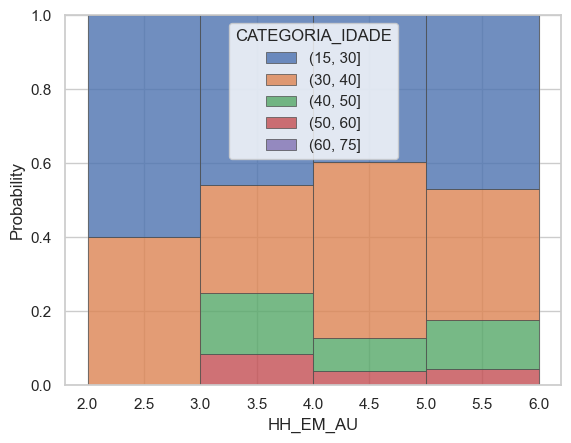

In [119]:
sns.histplot(
    data=df_4_analise.loc[(df_4_analise.labels == 0)],
    #x="FONTE_RENDA_AU", hue="CATEGORIA_PJ",
    x="HH_EM_AU", hue="CATEGORIA_IDADE",
    #x="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_PJ",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    bins=1,
    binrange=(0,30), 
    #common_norm=True,
     binwidth=1
)

In [ ]:
dataframes = [df_4_analise[df_4_analise['labels'] == i] for i in range(6)]

In [ ]:
sns.set_theme(style="darkgrid")
import numpy as np

df_sns = df_4_analise.query('labels' == 0)[['RENDA_M_INDIVIDUAL','HH_EM_AU','RENDA_POR_HH_AU','INDICE_SATISFACAO_PROFISSIONAL','INDICE_FORMACAO_ACADEMICA','ESCOLARIDADE','ATUACAO_INT','ATUACAO_AU','ATUACAO_PUR','ATUACAO_PSG','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_GEO','ATUACAO_ENS','ATUACAO_OUTROS']].copy()

corr = df_sns.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))

cmap = sns.color_palette("vlag_r", as_cmap=True)
#cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
            annot=True, square=True, linewidths=.9, cbar_kws={"shrink": .5})

arquivo = 'CORR_HEATMAP_PEARSON_FILLNA.png'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [ ]:
df_4_analise.columns

Index(['IDADE', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR',
       'RENDA_FONTE_ASSALARIADO1', 'RENDA_FONTE_ASSALARIADO4',
       'RENDA_FONTE_AUTONOMO2', 'RENDA_FONTE_EMPRESARIO2', 'FONTE_RENDA_AU',
       'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA', 'HH_EM_AU', 'HH_FORA_AU',
       'RENDA_POR_HH_AU', 'RENDA_POR_HH_TOTAL', 'ESCOLARIDADE',
       'INDICE_FORMACAO_ACADEMICA', 'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS',
       'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS',
       'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU',
       'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA',
       'QNTD_ENTIDADES_FILIADAS', 'DOMINIO_INFORMATICA', 'CATEGORIA_GENERO',
       'UF', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT', 'ATUACAO_PSG',
       'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT',
       'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS',
       'DOMINIO_OUTROS_SOFTWARES', 'QNTD_AREAS_ATUACAO', 'labels',
       'CATEGORIA_IDADE'],
      dtype='ob

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


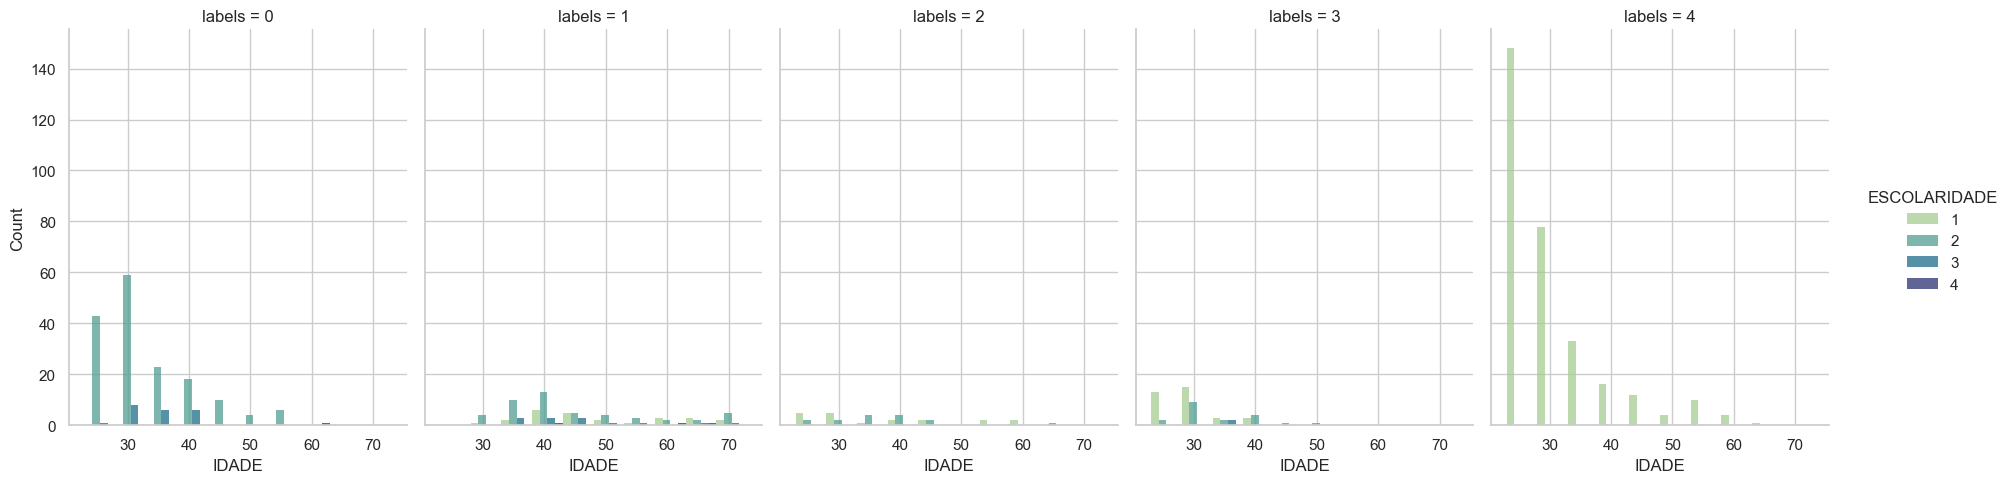

In [121]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'dodge'
kwargs_displot['binwidth'] = 5
sns.displot(
    df_4_analise,
    x="IDADE", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


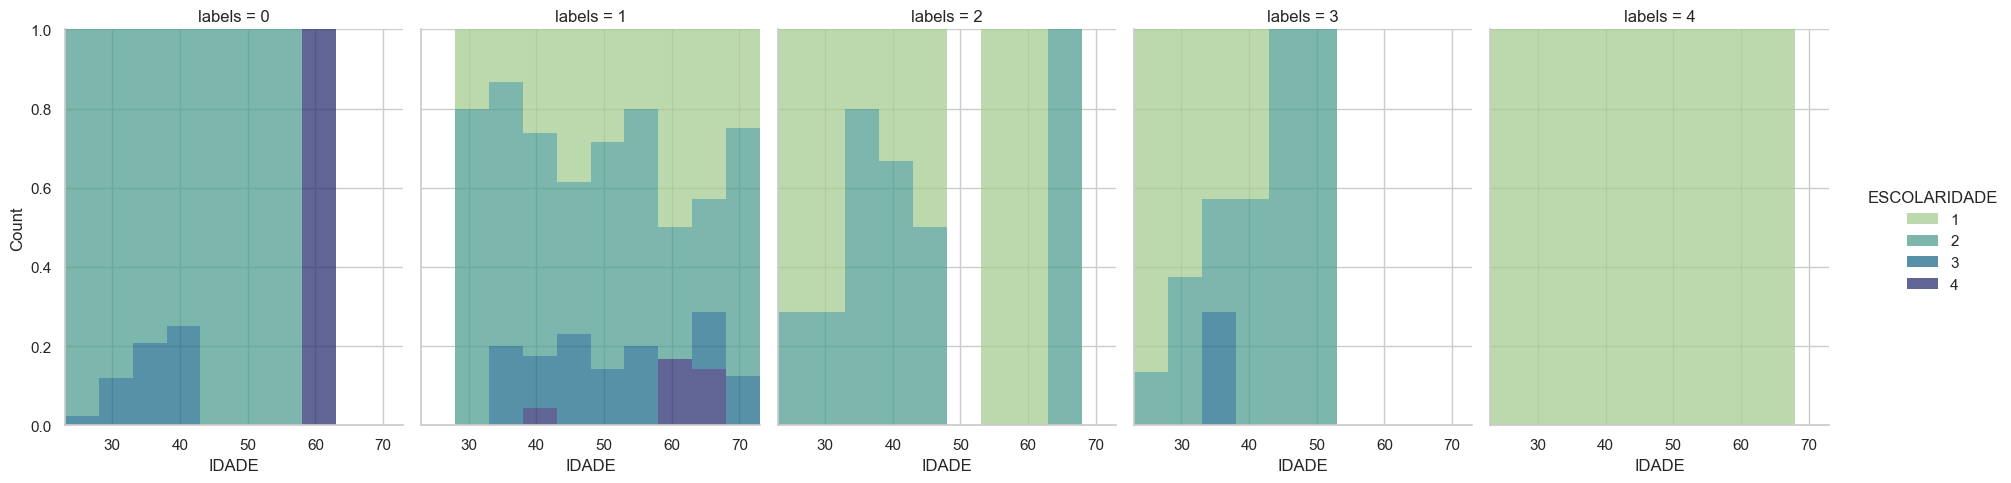

In [122]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'fill'
kwargs_displot['binwidth'] = 5
sns.displot(
    df_4_analise,
    x="IDADE", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


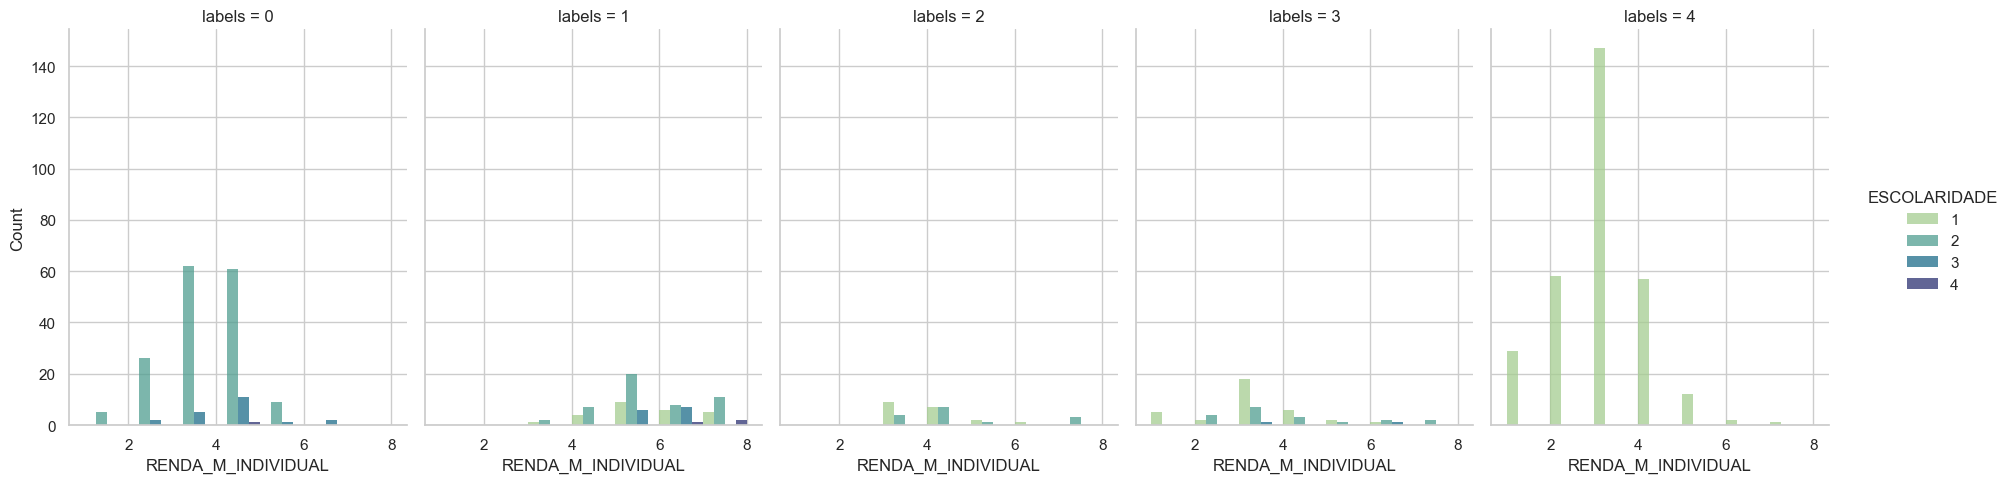

In [123]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'dodge'
kwargs_displot['binwidth'] = 1
sns.displot(
    df_4_analise,
    x="RENDA_M_INDIVIDUAL", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


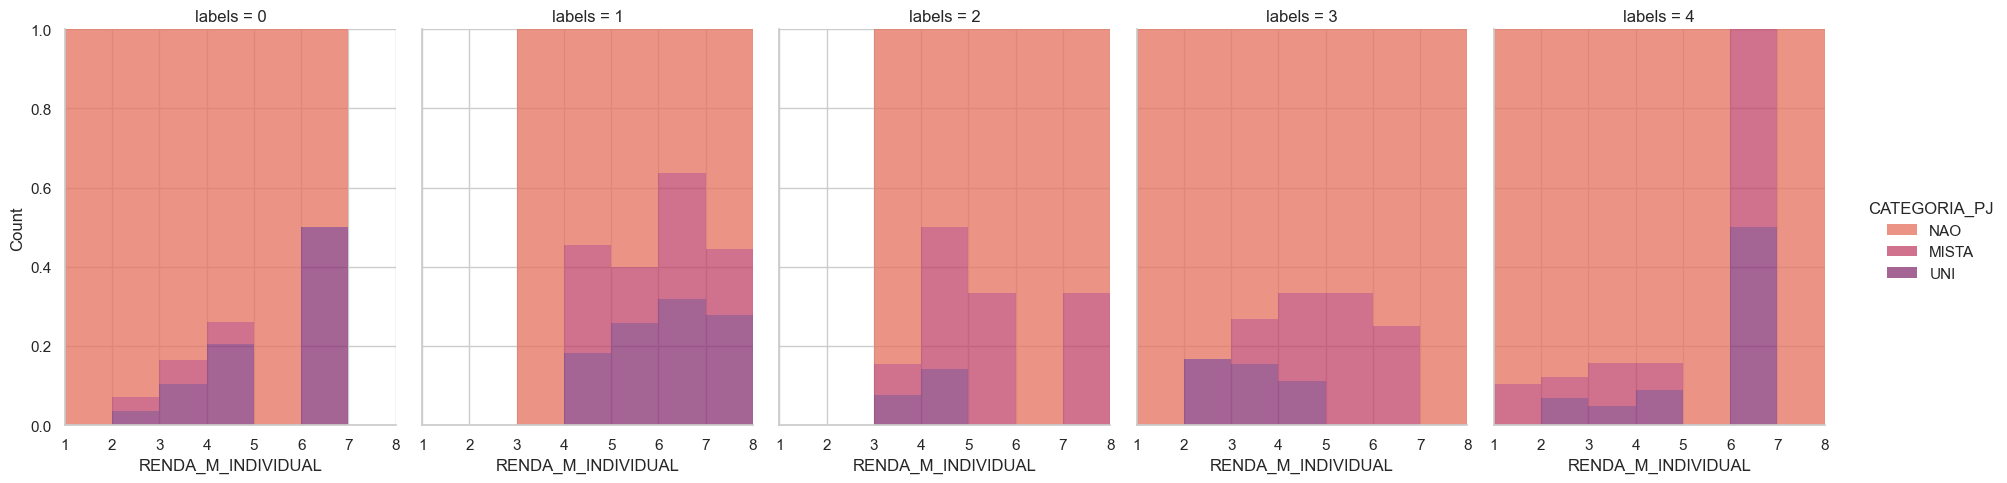

In [124]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'fill'
kwargs_displot['binwidth'] = 1
sns.displot(
    df_4_analise,
    x="RENDA_M_INDIVIDUAL", col="labels", hue="CATEGORIA_PJ",
    aspect=.75, linewidth=0, palette='flare',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


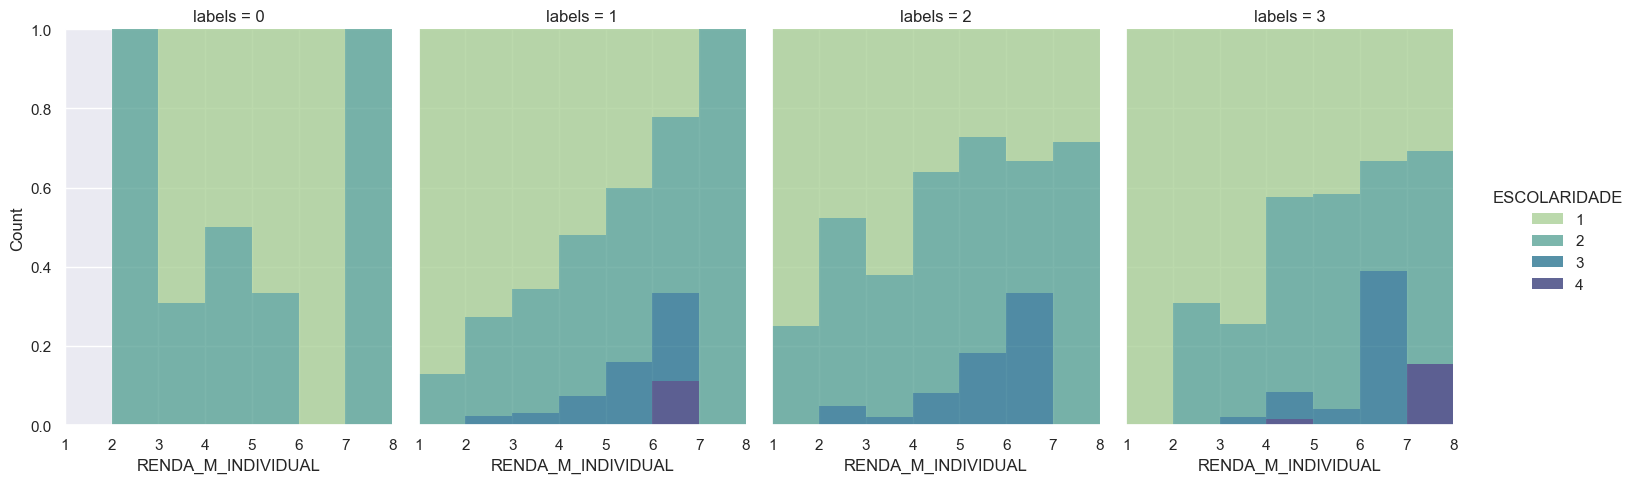

In [ ]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'fill'
kwargs_displot['binwidth'] = 1
sns.displot(
    df_4_analise,
    x="RENDA_M_INDIVIDUAL", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


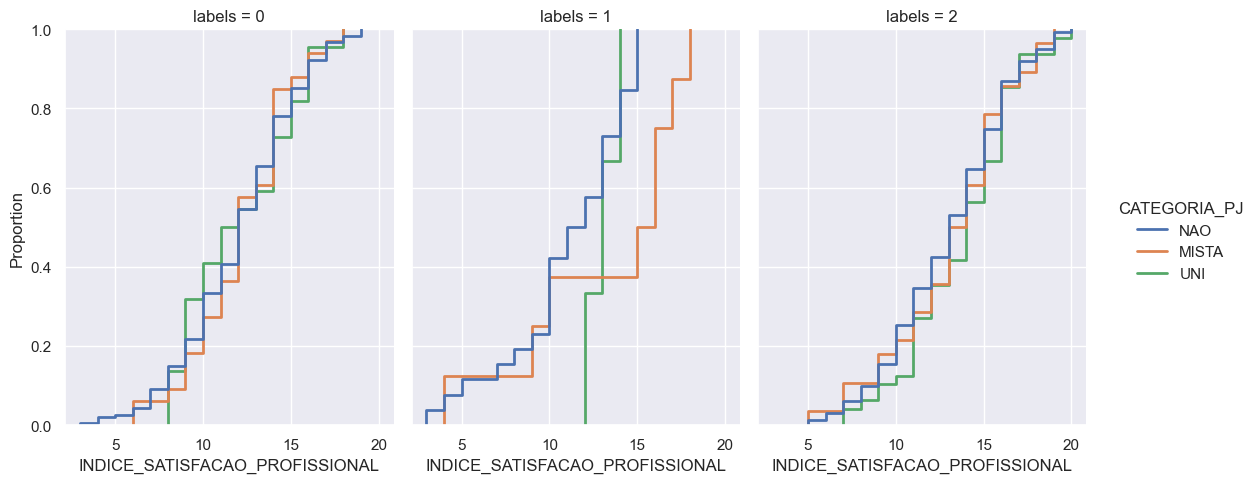

In [326]:
sns.displot(
    df_4_analise,
    x="INDICE_SATISFACAO_PROFISSIONAL", col="labels", hue="CATEGORIA_PJ",
    kind="ecdf", aspect=.75, linewidth=2, palette='deep',
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


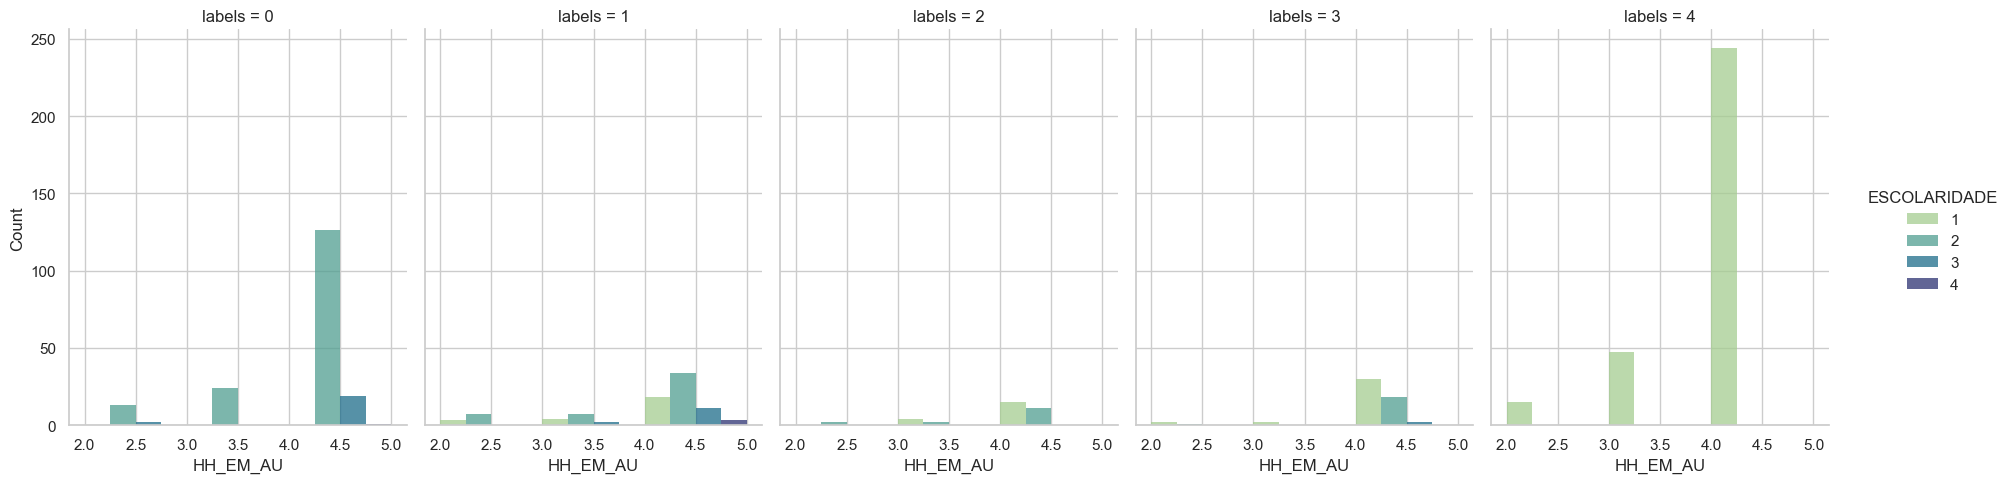

In [126]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'dodge'
kwargs_displot['binwidth'] = 1
sns.displot(
    df_4_analise,
    x="HH_EM_AU", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


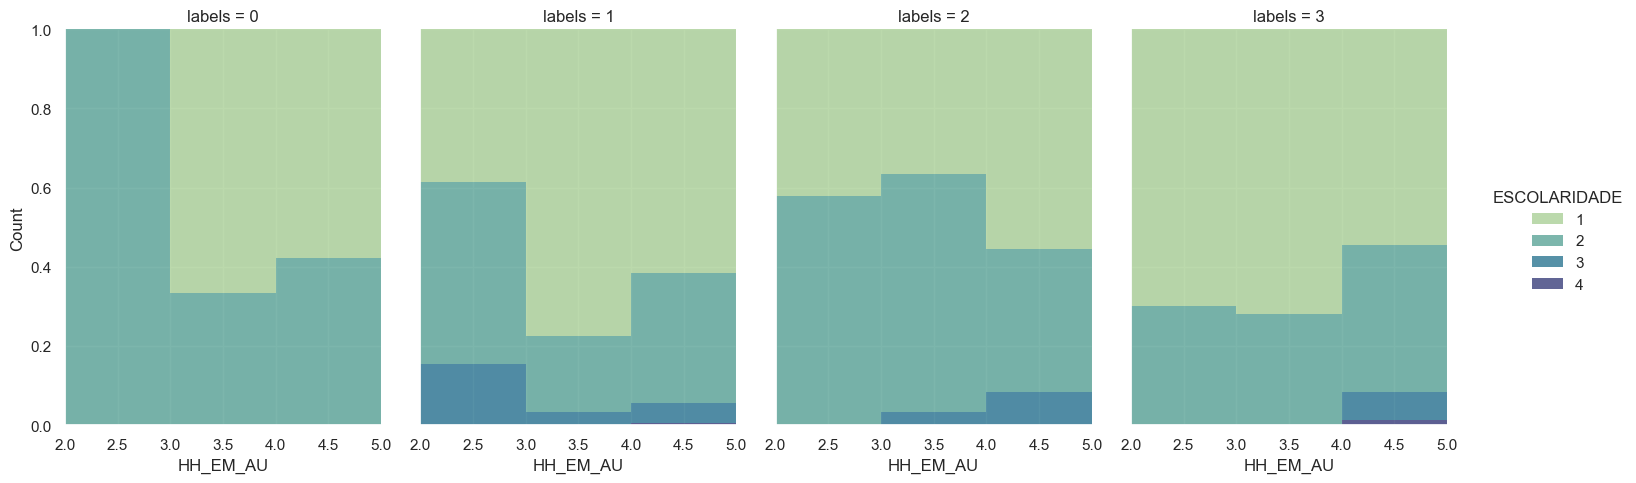

In [ ]:
kwargs_displot = {}
kwargs_displot['multiple'] = 'fill'
kwargs_displot['binwidth'] = 1
sns.displot(
    df_4_analise,
    x="HH_EM_AU", col="labels", hue="ESCOLARIDADE",
    aspect=.75, linewidth=0, palette='crest',
    **kwargs_displot
)

In [ ]:
df_4_analise.loc[(df_4_analise.labels == 0)]

,index,RENDA_M_INDIVIDUAL,RENDA_M_FAMILIAR,FONTE_RENDA_AU,FONTE_RENDA_NAO_AU,FONTE_RENDA_EXTRA,HH_EM_AU,HH_FORA_AU,ESCOLARIDADE,INDICE_FORMACAO_ACADEMICA,...,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS,labels
5,416,1,7,1,0,0,6,1,0,9,...,0,1,0,0,0,0,0,0,0,0
12,685,1,5,1,1,1,5,5,1,9,...,0,0,0,0,0,0,0,0,0,0
18,963,1,3,1,0,0,1,1,0,9,...,0,1,0,0,0,1,0,0,0,0
25,1359,5,7,1,0,0,6,1,1,6,...,0,1,0,0,0,0,0,0,0,0
26,1606,3,6,1,0,1,4,4,1,8,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,44924,2,6,1,0,1,5,2,0,9,...,1,1,1,0,0,1,0,0,0,0
659,44965,3,6,0,1,0,4,5,1,14,...,1,1,0,0,1,0,1,0,0,0
660,44987,3,4,1,0,0,5,0,2,18,...,0,0,0,0,0,0,0,0,1,0
666,45278,4,6,1,0,0,6,1,1,9,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_4_analise.loc[(df_4_analise.labels == 0)].drop(labels=['REGIAO','CATEGORIA_PJ','CATEGORIA_IDADE','labels'],axis=1).corr(method='pearson')

,index,RENDA_M_INDIVIDUAL,RENDA_M_FAMILIAR,FONTE_RENDA_AU,FONTE_RENDA_NAO_AU,FONTE_RENDA_EXTRA,HH_EM_AU,HH_FORA_AU,ESCOLARIDADE,INDICE_FORMACAO_ACADEMICA,...,ATUACAO_INT,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS
index,1.000000,0.315254,0.071764,-1.017069e-01,-0.042467,0.006152,0.114331,0.104183,0.115267,0.180444,...,-0.195912,0.003280,0.106373,-0.000116,-0.070080,0.075555,0.035195,0.018638,-0.137438,0.221379
RENDA_M_INDIVIDUAL,0.315254,1.000000,0.389709,1.086840e-01,-0.028025,-0.198206,0.269146,-0.089534,0.199033,0.065763,...,-0.253288,0.047370,-0.001866,0.123129,0.015630,-0.038937,0.138056,-0.027452,-0.090595,0.170811
RENDA_M_FAMILIAR,0.071764,0.389709,1.000000,3.709833e-02,0.039780,-0.045241,0.178318,-0.102765,0.021061,-0.119900,...,-0.065820,0.033455,-0.157101,-0.071272,-0.073240,-0.222596,0.170452,0.030438,0.113131,0.132270
FONTE_RENDA_AU,-0.101707,0.108684,0.037098,1.000000e+00,-0.390181,-0.470566,0.515253,-0.381253,0.006037,0.069202,...,0.089931,0.076412,0.091871,0.123971,0.059119,-0.051261,-0.089931,-0.043680,0.018255,0.148809
FONTE_RENDA_NAO_AU,-0.042467,-0.028025,0.039780,-3.901806e-01,1.000000,-0.008848,-0.344601,0.443689,0.054834,-0.046838,...,0.080080,-0.012089,-0.121250,-0.002539,-0.021274,0.080778,0.096368,0.202959,-0.005235,-0.073031
FONTE_RENDA_EXTRA,0.006152,-0.198206,-0.045241,-4.705664e-01,-0.008848,1.000000,-0.363411,0.208421,-0.069494,-0.032257,...,0.018261,0.055301,-0.020498,-0.068327,-0.107335,0.097590,0.171654,0.054841,0.078881,0.054841
HH_EM_AU,0.114331,0.269146,0.178318,5.152530e-01,-0.344601,-0.363411,1.000000,-0.537043,0.141200,0.134402,...,-0.050854,0.209186,0.055195,0.192637,0.155538,-0.226003,-0.024844,-0.182401,-0.172177,0.054404
HH_FORA_AU,0.104183,-0.089534,-0.102765,-3.812531e-01,0.443689,0.208421,-0.537043,1.000000,0.025775,-0.084663,...,0.042690,-0.085427,-0.009499,-0.150583,-0.112012,0.088777,0.055102,0.181434,0.010154,-0.124486
ESCOLARIDADE,0.115267,0.199033,0.021061,6.036814e-03,0.054834,-0.069494,0.141200,0.025775,1.000000,0.462174,...,-0.093080,-0.063642,-0.127532,-0.036851,0.232312,0.003440,0.093080,0.102458,-0.095334,0.322355
INDICE_FORMACAO_ACADEMICA,0.180444,0.065763,-0.119900,6.920207e-02,-0.046838,-0.032257,0.134402,-0.084663,0.462174,1.000000,...,-0.020499,0.032660,-0.024051,-0.056533,0.190254,-0.001288,0.089418,-0.037702,-0.063385,0.321629


In [ ]:
sns.set_theme(style="darkgrid")
corr = df_4_analise.loc[(df_4_analise.labels == 0)].drop(
    labels=['REGIAO','CATEGORIA_PJ','CATEGORIA_IDADE','labels','index','RENDA_M_FAMILIAR','RENDA_M_INDIVIDUAL','FONTE_RENDA_EXTRA','ESCOLARIDADE','INDICE_SATISFACAO_IES','INDICE_OBSTACULOS_PROFISSIONAIS','FONTE_RENDA_NAO_AU','CATEGORIA_GENERO','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS','INDICE_PARTICIPACAO_EVENTOS','INDICE_SATISFACAO_PROFISSIONAL'],
    axis=1,
    ).corr(method='pearson')
#corr = df_sns.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))

cmap = sns.color_palette("vlag_r", as_cmap=True)
#cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
            annot=True, square=True, linewidths=.9, cbar_kws={"shrink": .5})

KeyError: "['index'] not found in axis"